# **Project Performance & Predictive Risk Dashboard**
This project delivers a comprehensive analytics solution for optimizing project management and mitigating timeline/budget risks. Leveraging Python for robust data engineering and machine learning, and Power BI for interactive visualization, it provides both a diagnostic overview of project health and a predictive layer to identify tasks at risk of becoming overdue.
---
## **📊 Project Overview & Motivation**
In complex project environments, fragmented data and a lack of proactive insights often lead to resource inefficiencies, missed deadlines, and budget overruns. This project addresses these challenges by:

- Unifying disparate task data into a coherent, analyzable structure.

- Providing a clear, real-time view of project performance and bottlenecks.

- Forecasting potential overdue tasks to enable proactive intervention.

- Quantifying the financial impact of inefficiencies (rework, delays) to drive strategic decisions.

The solution is designed to enhance resource allocation efficiency and reduce operational expenditures by providing data-driven insights.


## 0. Setup & Configuration

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Data Loading and Initial Exploration

### 1.2 Initial Data Overview

In [ ]:
df_messy_tasks = pd.read_csv('/content/drive/MyDrive/Clickup Project/dummy_clickup_tasks_messy.csv')

In [ ]:
df_clean_tasks = pd.read_csv('/content/drive/MyDrive/Clickup Project/dummy_clickup_tasks_clean.csv')

In [ ]:
df_assignees = pd.read_csv('/content/drive/MyDrive/Clickup Project/dim_assignees.csv')

In [ ]:
df_task_types = pd.read_csv('/content/drive/MyDrive/Clickup Project/dim_task_types.csv')

## 2. Data Cleaning and Preprocessing

In [ ]:
df_messy_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   task_id                273 non-null    object 
 1   parent_id              223 non-null    object 
 2   project_name           273 non-null    object 
 3   task_name              273 non-null    object 
 4   status                 273 non-null    object 
 5   percentage_completion  245 non-null    float64
 6   date_created           273 non-null    object 
 7   start_date             273 non-null    object 
 8   due_date               235 non-null    object 
 9   date_completed         86 non-null     object 
 10  time_tracked_hours     220 non-null    float64
 11  task_type              273 non-null    object 
 12  complexity_points      273 non-null    int64  
 13  priority               273 non-null    object 
 14  blocker_reason         15 non-null     object 
 15  qualit

In [ ]:
df_messy_tasks.head()

,task_id,parent_id,project_name,task_name,status,percentage_completion,date_created,start_date,due_date,date_completed,time_tracked_hours,task_type,complexity_points,priority,blocker_reason,quality_review_status,last_updated_date,predecessor_task_id,assignee_id
0,T-00001,NaN,Holiday Marketing Campaign - Social Media Focus,Deployment Script - T-00001,todo,NaN,2024-09-12,2024-09-18,2024-10-14,NaN,NaN,Deployment & Release,3,High,NaN,NaN,2025-07-02,NaN,ASS-006
1,T-00002,T-00001,Customer Onboarding Flow Optimization,Data Collection Setup - T-00002,Review,NaN,2024-07-19,2024-07-24,2024-08-23,2024-08-21,11.6,Analytics & Reporting,1,Low,NaN,NaN,2025-07-02,NaN,ASS-009
2,T-00003,NaN,Q3 Product Feature Launch - AI Integration,Performance Report - T-00003,Review,100.0,2024-11-13,2024-11-13,2024-11-24,2024-11-27,32.6,Analytics & Reporting,3,Critical,NaN,NaN,2025-07-04,NaN,ASS-012
3,T-00004,T-00003,Customer Onboarding Flow Optimization,Wireframe Creation - T-00004,To Do,0.0,2025-03-06,2025-03-07,2025-04-20,NaN,0.0,Design & UX,2,Critical,NaN,NaN,2025-07-03,NaN,ASS-006
4,T-00005,T-00004,Q3 Product Feature Launch - AI Integration,Integration Testing - T-00005,To Do,0.0,2024-08-08,2024-08-08,2024-08-28,NaN,NaN,QA & Testing,5,Low,NaN,NaN,2025-06-29,NaN,ASS-011


### Handle Missing Values & Inconsistencies (Core Imputation)

In [ ]:
df_messy_tasks.isnull().sum()

,0
task_id,0
parent_id,50
project_name,0
task_name,0
status,0
percentage_completion,28
date_created,0
start_date,0
due_date,38
date_completed,187


In [ ]:
df_messy_tasks.isnull().sum() / len(df_messy_tasks) * 100

,0
task_id,0.000000
parent_id,18.315018
project_name,0.000000
task_name,0.000000
status,0.000000
percentage_completion,10.256410
date_created,0.000000
start_date,0.000000
due_date,13.919414
date_completed,68.498168


In [ ]:
df_clean_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   task_id                273 non-null    object 
 1   parent_id              223 non-null    object 
 2   project_name           273 non-null    object 
 3   task_name              273 non-null    object 
 4   status                 273 non-null    object 
 5   percentage_completion  273 non-null    float64
 6   date_created           273 non-null    object 
 7   start_date             273 non-null    object 
 8   due_date               273 non-null    object 
 9   date_completed         86 non-null     object 
 10  time_tracked_hours     273 non-null    float64
 11  task_type              273 non-null    object 
 12  complexity_points      273 non-null    int64  
 13  priority               273 non-null    object 
 14  blocker_reason         53 non-null     object 
 15  qualit

In [ ]:
df_clean_tasks.isnull().sum()

,0
task_id,0
parent_id,50
project_name,0
task_name,0
status,0
percentage_completion,0
date_created,0
start_date,0
due_date,0
date_completed,187


In [ ]:
df_messy_tasks['date_completed'].notnull().sum()

np.int64(86)

In [ ]:
df_messy_tasks['status'].value_counts()

,count
status,
To Do,55
Review,50
Blocked,43
Completed,36
In Progress,28
REVIEW,18
in progress,14
todo,11
blocked!,10


#### Impute parent_id (e.g., "No Parent").

In [ ]:
df_messy_tasks['parent_id'].value_counts()

,count
parent_id,
T-00012,4
T-00026,4
T-00027,4
T-00051,4
T-00041,4
...,...
T-00179,1
T-00181,1
T-00210,1


In [ ]:
# Replacing null parent_id with no parent value
df_messy_tasks['parent_id'] = df_messy_tasks['parent_id'].apply(lambda x: "No Parent" if pd.isnull(x) else x)

In [ ]:
df_messy_tasks['parent_id'].value_counts()

,count
parent_id,
No Parent,50
T-00012,4
T-00026,4
T-00027,4
T-00051,4
...,...
T-00179,1
T-00181,1
T-00210,1


In [ ]:
df_messy_tasks.shape

(273, 19)

In [ ]:
# Data completed
df_messy_tasks['date_completed'].isnull().sum() # Therefore 187 out of 273 tasks have missing completed date

np.int64(187)

In [ ]:
df_messy_tasks['status'].value_counts()
# We can say the tasks those are not completed, has no date completed, so total
# task completed = 36+8 = 44 and also the task that are under review = 50+18 = 68
# 68 +44 = 112 != 273-187 = 86

,count
status,
To Do,55
Review,50
Blocked,43
Completed,36
In Progress,28
REVIEW,18
in progress,14
todo,11
blocked!,10


In [ ]:
# df_messy_tasks[(df_messy_tasks['status']=='completed.') | (df_messy_tasks['status']=='Completed')][['status','date_completed']]

In [ ]:
# df_messy_tasks[(df_messy_tasks['status']=='completed.') | (df_messy_tasks['status']=='Completed')][['status','date_completed']].value_counts().sum()

In [ ]:
df_messy_tasks[df_messy_tasks['date_completed'].isna()]['status'].value_counts()
# To do/todo, in progress/In Progress and Blocked/blocked have all null values for date completion
# some review/Review have non null values

,count
status,
To Do,55
Blocked,43
In Progress,28
Review,15
in progress,14
todo,11
REVIEW,11
blocked!,10


In [ ]:
# # Check for tasks with 'Completed' status but missing 'date_completed'
# problematic_completed_tasks = df_messy_tasks[
#     (df_messy_tasks['status'].str.contains('Completed', case=False, na=False)) & # Use .str.contains for inconsistent spellings
#     (df_messy_tasks['date_completed'].isna())
# ]

# print("\nTasks with 'Completed' status but missing 'date_completed':")
# print(problematic_completed_tasks[['task_id', 'status', 'date_completed']].head())
# print(f"Total problematic completed tasks: {len(problematic_completed_tasks)}")

In [ ]:
# # Check for total missing values per column
# missing_values_count = df_messy_tasks.isnull().sum()
# print("Missing values count per column:\n", missing_values_count)

# # Check for percentage of missing values per column
# missing_values_percentage = (df_messy_tasks.isnull().sum() / len(df_messy_tasks)) * 100
# print("\nMissing values percentage per column:\n", missing_values_percentage)

In [ ]:
df_messy_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   task_id                273 non-null    object 
 1   parent_id              273 non-null    object 
 2   project_name           273 non-null    object 
 3   task_name              273 non-null    object 
 4   status                 273 non-null    object 
 5   percentage_completion  245 non-null    float64
 6   date_created           273 non-null    object 
 7   start_date             273 non-null    object 
 8   due_date               235 non-null    object 
 9   date_completed         86 non-null     object 
 10  time_tracked_hours     220 non-null    float64
 11  task_type              273 non-null    object 
 12  complexity_points      273 non-null    int64  
 13  priority               273 non-null    object 
 14  blocker_reason         15 non-null     object 
 15  qualit

### Standardize Categorical Columns:

In [ ]:
# blocker reason
df_messy_tasks['blocker_reason'].isnull().sum()

np.int64(258)

In [ ]:
# df_messy_tasks['status'].value_counts()
blocked_data = df_messy_tasks[(df_messy_tasks['status']=='Blocked') | (df_messy_tasks['status']=='blocked!')][['status','blocker_reason']]
blocked_data

,status,blocker_reason
12,Blocked,NaN
22,Blocked,Technical Bug Found
23,Blocked,NaN
26,Blocked,NaN
32,Blocked,NaN
34,Blocked,Resource Unavailability
59,Blocked,NaN
61,blocked!,NaN
64,Blocked,NaN
66,blocked!,Design Approval Needed


In [ ]:
blocked_data['blocker_reason'].value_counts().sum()

np.int64(15)

#### ```status``` standardization

In [ ]:
df_messy_tasks['status'].value_counts()

,count
status,
To Do,55
Blocked,53
Review,50
Completed,36
In Progress,28
REVIEW,18
in progress,14
todo,11
completed.,8


In [ ]:
# standardize the status column
df_messy_tasks.loc[df_messy_tasks['status']=='todo','status']='To Do'
df_messy_tasks.loc[df_messy_tasks['status']=='REVIEW','status']='Review'
df_messy_tasks.loc[df_messy_tasks['status']=='in progress','status']='In Progress'
df_messy_tasks.loc[df_messy_tasks['status']=='completed.','status']='Completed'

In [ ]:
df_messy_tasks['status'].value_counts()

,count
status,
Review,68
To Do,66
Blocked,53
Completed,44
In Progress,42


#### ```priority``` standardization

In [ ]:
# Priorities
df_messy_tasks['priority'].value_counts()

,count
priority,
Medium,69
High,63
Critical,63
Low,45
medium,12
high,10
CRITICAL,6
low,5


In [ ]:
# Priorities
df_messy_tasks['priority']=df_messy_tasks['priority'].str.capitalize()

In [ ]:
# Priorities
df_messy_tasks['priority'].value_counts()

,count
priority,
Medium,81
High,73
Critical,69
Low,50


#### ```blocker_reason``` standardization and conditional imputation.

In [ ]:
# Step 1, correct the Blocked and blocked! to Blocked
df_messy_tasks.loc[df_messy_tasks['status']=='blocked!', 'status'] = 'Blocked'

In [ ]:
df_messy_tasks['status'].value_counts()

,count
status,
To Do,55
Blocked,53
Review,50
Completed,36
In Progress,28
REVIEW,18
in progress,14
todo,11
completed.,8


In [ ]:
# Fill missing 'blocker_reason' for 'Blocked' tasks
df_messy_tasks.loc[df_messy_tasks['status']=='Blocked', 'blocker_reason'] = df_messy_tasks.loc[df_messy_tasks['status']=='Blocked', 'blocker_reason'].fillna("Unknown Blocker Reason")

In [ ]:
df_messy_tasks[df_messy_tasks['status']== 'Blocked']['blocker_reason'].value_counts()

,count
blocker_reason,
Unknown Blocker Reason,38
Technical Bug Found,4
Design Approval Needed,3
Resource Unavailability,2
Awaiting Client Feedback,1
unexpected scope creep,1
Data Access Issues,1
cross-team handoff delay,1
Technical Bug Found!,1


In [ ]:
print("\nStatus value counts:\n", df_messy_tasks['status'].value_counts())
print("\nPriority value counts:\n", df_messy_tasks['priority'].value_counts())
print("\nBlocker Reason value counts:\n", df_messy_tasks['blocker_reason'].value_counts(dropna=False))


Status value counts:
 status
To Do          55
Blocked        53
Review         50
Completed      36
In Progress    28
REVIEW         18
in progress    14
todo           11
completed.      8
Name: count, dtype: int64

Priority value counts:
 priority
Medium      69
High        63
Critical    63
Low         45
medium      12
high        10
CRITICAL     6
low          5
Name: count, dtype: int64

Blocker Reason value counts:
 blocker_reason
NaN                         220
Unknown Blocker Reason       38
Technical Bug Found           4
Design Approval Needed        3
Resource Unavailability       2
Awaiting Client Feedback      1
unexpected scope creep        1
Data Access Issues            1
cross-team handoff delay      1
Technical Bug Found!          1
DataAccessIssues              1
Name: count, dtype: int64


In [ ]:
df_messy_tasks[df_messy_tasks['status']== 'Blocked']['blocker_reason'].value_counts()

,count
blocker_reason,
Unknown Blocker Reason,38
Technical Bug Found,4
Design Approval Needed,3
Resource Unavailability,2
Awaiting Client Feedback,1
unexpected scope creep,1
Data Access Issues,1
cross-team handoff delay,1
Technical Bug Found!,1


In [ ]:
# Step 1, correct the Blocked and blocked! to Blocked
df_messy_tasks.loc[df_messy_tasks['blocker_reason']=='DataAccessIssues', 'blocker_reason'] = 'Data Access Issues'

In [ ]:
# Step 1, correct the Blocked and blocked! to Blocked
df_messy_tasks.loc[df_messy_tasks['blocker_reason']=='Technical Bug Found!', 'blocker_reason'] = 'Technical Bug Found'

In [ ]:
df_messy_tasks[df_messy_tasks['status']== 'Blocked']['blocker_reason'].value_counts()

,count
blocker_reason,
Unknown Blocker Reason,38
Technical Bug Found,5
Design Approval Needed,3
Resource Unavailability,2
Data Access Issues,2
Awaiting Client Feedback,1
unexpected scope creep,1
cross-team handoff delay,1


In [ ]:
print("\n--- Cleaning 'blocker_reason' column (Standardization & Imputation) ---")

# --- Part 1: Standardize existing non-null string values ---
# Convert to string to handle NaNs gracefully before string operations, then replace 'nan' string with actual NaN
df_messy_tasks['blocker_reason'] = df_messy_tasks['blocker_reason'].astype(str).replace('nan', np.nan)

# Apply general cleaning: remove '!', strip whitespace, convert to Title Case
df_messy_tasks['blocker_reason'] = df_messy_tasks['blocker_reason'].str.replace('!', '', regex=False).str.strip()
df_messy_tasks['blocker_reason'] = df_messy_tasks['blocker_reason'].str.title()

# Map specific known inconsistent variations (e.g., merged words or specific misspellings)
blocker_reason_mapping = {
    'Dataaccessissues': 'Data Access Issues', # Correct 'DataAccessIssues' after title()
    'Cross-Team Handoff Delay': 'Cross-Team Handoff Delay', # Ensure consistency
    'Unexpected Scope Creep': 'Unexpected Scope Creep', # Ensure consistency
    'Unknown Blocker Reason': 'Unknown Blocker Reason', # Keep this placeholder consistent
}
# Apply the mapping, handling potential NaNs from previous steps
df_messy_tasks['blocker_reason'] = df_messy_tasks['blocker_reason'].replace(blocker_reason_mapping)

# --- Part 2: Address problematic NaN values for 'Blocked' tasks ---
# Identify tasks where status is 'Blocked' AND blocker_reason is NaN
# We can now rely on the 'status' column being clean ('Blocked')
problematic_blocker_mask = (df_messy_tasks['status'] == 'Blocked') & (df_messy_tasks['blocker_reason'].isna())

# Impute these specific NaNs with 'Unknown Blocker Reason'
df_messy_tasks.loc[problematic_blocker_mask, 'blocker_reason'] = 'Unknown Blocker Reason'

# --- Part 3: Confirm remaining NaNs are meaningful (for non-blocked tasks) ---
# For tasks that are NOT 'Blocked', ensure blocker_reason is NaN.
# If any non-blocked tasks somehow got a blocker reason during generation/manipulation, set it to NaN.
# (This is a defensive step, unlikely to be needed with our generation logic, but good practice)
non_blocked_mask = (df_messy_tasks['status'] != 'Blocked')
df_messy_tasks.loc[non_blocked_mask, 'blocker_reason'] = np.nan


print("\n'blocker_reason' value counts after full cleaning:")
print(df_messy_tasks['blocker_reason'].value_counts(dropna=False))

print("\n--- Verification: Blocker Reasons for 'Blocked' tasks only ---")
print(df_messy_tasks[df_messy_tasks['status'] == 'Blocked']['blocker_reason'].value_counts(dropna=False))

print("\n--- Verification: Blocker Reasons for NON-'Blocked' tasks ---")
print(df_messy_tasks[df_messy_tasks['status'] != 'Blocked']['blocker_reason'].value_counts(dropna=False))


--- Cleaning 'blocker_reason' column (Standardization & Imputation) ---

'blocker_reason' value counts after full cleaning:
blocker_reason
NaN                         220
Unknown Blocker Reason       38
Technical Bug Found           5
Design Approval Needed        3
Resource Unavailability       2
Data Access Issues            2
Awaiting Client Feedback      1
Unexpected Scope Creep        1
Cross-Team Handoff Delay      1
Name: count, dtype: int64

--- Verification: Blocker Reasons for 'Blocked' tasks only ---
blocker_reason
Unknown Blocker Reason      38
Technical Bug Found          5
Design Approval Needed       3
Resource Unavailability      2
Data Access Issues           2
Awaiting Client Feedback     1
Unexpected Scope Creep       1
Cross-Team Handoff Delay     1
Name: count, dtype: int64

--- Verification: Blocker Reasons for NON-'Blocked' tasks ---
blocker_reason
NaN    220
Name: count, dtype: int64


#### ````quality_review_status```` standardization and conditional imputation

In [ ]:
df_messy_tasks['quality_review_status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 273 entries, 0 to 272
Series name: quality_review_status
Non-Null Count  Dtype 
--------------  ----- 
39 non-null     object
dtypes: object(1)
memory usage: 2.3+ KB


In [ ]:
df_messy_tasks[df_messy_tasks['status']=='Review']['quality_review_status'].value_counts()

,count
quality_review_status,
Minor Rework,13
Passed,7
Failed QA,3
Major Rework,1


In [ ]:
df_messy_tasks[df_messy_tasks['status']=='Completed']['quality_review_status'].value_counts()

,count
quality_review_status,
Minor Rework,8
Failed QA,3
Major Rework,2
Passed,2


In [ ]:
df_messy_tasks['status'].value_counts()

,count
status,
Review,68
To Do,66
Blocked,53
Completed,44
In Progress,42


In [ ]:
print("--- Current 'quality_review_status' value counts (including NaNs) ---")
print(df_messy_tasks['quality_review_status'].value_counts(dropna=False))

--- Current 'quality_review_status' value counts (including NaNs) ---
quality_review_status
NaN             234
Minor Rework     21
Passed            9
Failed QA         6
Major Rework      3
Name: count, dtype: int64


In [ ]:
print("\n--- Cleaning 'quality_review_status' column (Imputation) ---")

# --- Part 1: Impute problematic NaN values for 'Completed' or 'Review' tasks ---
# Identify tasks where status is 'Completed' OR 'Review' AND quality_review_status is NaN
problematic_qr_mask = (
    (df_messy_tasks['status'] == 'Completed') |
    (df_messy_tasks['status'] == 'Review')
) & (df_messy_tasks['quality_review_status'].isna())

# Impute these specific NaNs with 'Review Status Missing'
df_messy_tasks.loc[problematic_qr_mask, 'quality_review_status'] = 'Review Status Missing'



--- Cleaning 'quality_review_status' column (Imputation) ---


In [ ]:
# --- Part 2: Confirm remaining NaNs are meaningful (for non-reviewed/completed tasks) ---
# For tasks that are NOT 'Completed' or 'Review', ensure quality_review_status is NaN.
# This is a defensive step to ensure no unexpected values exist for non-relevant statuses.
non_relevant_qr_mask = (
    (df_messy_tasks['status'] != 'Completed') &
    (df_messy_tasks['status'] != 'Review')
)
df_messy_tasks.loc[non_relevant_qr_mask, 'quality_review_status'] = np.nan
print("\n'quality_review_status' value counts after full cleaning:")
print(df_messy_tasks['quality_review_status'].value_counts(dropna=False))

print("\n--- Verification: Quality Review Status for 'Completed' or 'Review' tasks only ---")
print(df_messy_tasks[
    (df_messy_tasks['status'] == 'Completed') |
    (df_messy_tasks['status'] == 'Review')
]['quality_review_status'].value_counts(dropna=False))

print("\n--- Verification: Quality Review Status for NON-'Completed' or NON-'Review' tasks ---")
print(df_messy_tasks[
    (df_messy_tasks['status'] != 'Completed') &
    (df_messy_tasks['status'] != 'Review')
]['quality_review_status'].value_counts(dropna=False))


'quality_review_status' value counts after full cleaning:
quality_review_status
NaN                      161
Review Status Missing     73
Minor Rework              21
Passed                     9
Failed QA                  6
Major Rework               3
Name: count, dtype: int64

--- Verification: Quality Review Status for 'Completed' or 'Review' tasks only ---
quality_review_status
Review Status Missing    73
Minor Rework             21
Passed                    9
Failed QA                 6
Major Rework              3
Name: count, dtype: int64

--- Verification: Quality Review Status for NON-'Completed' or NON-'Review' tasks ---
quality_review_status
NaN    161
Name: count, dtype: int64


In [ ]:
# Check for total missing values per column
missing_values_count = df_messy_tasks.isnull().sum()
print("Missing values count per column:\n", missing_values_count)

# Check for percentage of missing values per column
missing_values_percentage = (df_messy_tasks.isnull().sum() / len(df_messy_tasks)) * 100
print("\nMissing values percentage per column:\n", missing_values_percentage)

Missing values count per column:
 task_id                    0
parent_id                  0
project_name               0
task_name                  0
status                     0
percentage_completion     28
date_created               0
start_date                 0
due_date                  38
date_completed           187
time_tracked_hours        53
task_type                  0
complexity_points          0
priority                   0
blocker_reason           220
quality_review_status    161
last_updated_date          0
predecessor_task_id      228
assignee_id                0
dtype: int64

Missing values percentage per column:
 task_id                   0.000000
parent_id                 0.000000
project_name              0.000000
task_name                 0.000000
status                    0.000000
percentage_completion    10.256410
date_created              0.000000
start_date                0.000000
due_date                 13.919414
date_completed           68.498168
time_tracked

In [ ]:
df_messy_tasks['predecessor_task_id'].value_counts(dropna=False)

,count
predecessor_task_id,
NaN,228
T-00006,3
T-00098,3
T-00057,2
T-00002,1
T-00021,1
T-00013,1
T-00004,1
T-00024,1


In [ ]:
df_messy_tasks['predecessor_task_id']= df_messy_tasks['predecessor_task_id'].replace("", np.nan)

In [ ]:
df_messy_tasks['predecessor_task_id'].value_counts(dropna=False)

,count
predecessor_task_id,
NaN,228
T-00006,3
T-00098,3
T-00057,2
T-00002,1
T-00021,1
T-00013,1
T-00004,1
T-00024,1


In [ ]:
# Create the 'has_predecessor' flag
df_messy_tasks['has_predecessor'] = df_messy_tasks['predecessor_task_id'].notna()
df_messy_tasks['has_predecessor'].value_counts()

,count
has_predecessor,
False,228
True,45


In [ ]:
df_messy_tasks['date_completed'].value_counts(dropna=False)

,count
date_completed,
NaN,187
2025-04-05,3
2025-03-05,2
2025-05-14,2
2025-01-23,2
...,...
2024-10-12,1
2024-10-23,1
2025-05-10,1


In [ ]:
df_messy_tasks[(df_messy_tasks['date_completed'].isna()) & (df_messy_tasks['status']=='completed')][['status', 'date_completed']]

,status,date_completed


In [ ]:
df_messy_tasks[df_messy_tasks['date_completed'].isna()]['status'].value_counts()

,count
status,
To Do,66
Blocked,53
In Progress,42
Review,26


In [ ]:
print("\n--- Verifying `date_completed` NaNs ---")

# Filter for tasks where date_completed is NaN
tasks_with_missing_completion_date = df_messy_tasks[df_messy_tasks['date_completed'].isna()]

# Check the status distribution for these tasks
print("Status distribution for tasks with missing 'date_completed':")
print(tasks_with_missing_completion_date['status'].value_counts(dropna=False))

# Also, let's explicitly check if any 'Completed' tasks still have NaN date_completed after all previous cleaning
problematic_completed_after_cleaning = df_messy_tasks[
    (df_messy_tasks['status'] == 'Completed') & (df_messy_tasks['date_completed'].isna())
]
print(f"\nNumber of 'Completed' tasks with missing 'date_completed' (after cleaning): {len(problematic_completed_after_cleaning)}")


--- Verifying `date_completed` NaNs ---
Status distribution for tasks with missing 'date_completed':
status
To Do          66
Blocked        53
In Progress    42
Review         26
Name: count, dtype: int64

Number of 'Completed' tasks with missing 'date_completed' (after cleaning): 0


In [ ]:
df_messy_tasks['time_tracked_hours'].value_counts(dropna=False)

,count
time_tracked_hours,
NaN,53
0.0,48
6.2,4
4.0,3
17.5,3
...,...
33.5,1
29.1,1
22.7,1


In [ ]:
df_messy_tasks['time_tracked_hours'].isnull().sum()

np.int64(53)

In [ ]:
df_messy_tasks['status'].value_counts()

,count
status,
Review,68
To Do,66
Blocked,53
Completed,44
In Progress,42


In [ ]:
# Filter for tasks where 'time_tracked_hours' is null
tasks_with_missing_time = df_messy_tasks[df_messy_tasks['time_tracked_hours'].isna()]

# Get the value counts of the 'status' column for these tasks
status_distribution_missing_time = tasks_with_missing_time['status'].value_counts()

print("Status distribution for tasks with missing 'time_tracked_hours':")
print(status_distribution_missing_time)

Status distribution for tasks with missing 'time_tracked_hours':
status
To Do          18
Completed      11
Blocked        11
Review          8
In Progress     5
Name: count, dtype: int64


In [ ]:
df_messy_tasks[df_messy_tasks['status']=='To Do']['time_tracked_hours'].value_counts(dropna=False) # check to do tasks

,count
time_tracked_hours,
0.0,48
NaN,18


In [ ]:
df_messy_tasks.loc[df_messy_tasks['status']=='To Do','time_tracked_hours'] = 0.0

In [ ]:
df_messy_tasks[df_messy_tasks['status']=='To Do']['time_tracked_hours'].value_counts(dropna=False) # check to do tasks

,count
time_tracked_hours,
0.0,66


In [ ]:
print("\n--- Cleaning 'time_tracked_hours' column (Conditional Imputation for remaining statuses) ---")

# Calculate median time_tracked_hours grouped by task_type and complexity_points from genuinely positive time data
# We exclude 0.0 values from the median calculation as they are problematic for these statuses.
median_hours_by_type_complexity = df_messy_tasks[df_messy_tasks['time_tracked_hours'] > 0].groupby(['task_type', 'complexity_points'])['time_tracked_hours'].median()

# Identify tasks that need imputation:
# Status is 'In Progress', 'Blocked', 'Review', OR 'Completed'
# AND time_tracked_hours is either NaN OR 0.0
imputation_mask = (
    (df_messy_tasks['status'].isin(['In Progress', 'Blocked', 'Review', 'Completed'])) &
    ((df_messy_tasks['time_tracked_hours'].isna()) | (df_messy_tasks['time_tracked_hours'] == 0.0))
)

# Apply conditional imputation using .loc for efficiency
# Using .loc with a mask and column label is the most robust way to assign values
for index, row in df_messy_tasks[imputation_mask].iterrows():
    task_type = row['task_type']
    complexity = row['complexity_points']

    # Try to get median from the specific group
    imputed_value = median_hours_by_type_complexity.get((task_type, complexity))

    # Fallback if no specific median exists for that group
    if pd.isna(imputed_value) or imputed_value == 0: # If even overall median is NaN or 0, default to a reasonable value
        # Fallback to overall median of non-zero, non-missing time_tracked_hours
        overall_median = df_messy_tasks[df_messy_tasks['time_tracked_hours'] > 0]['time_tracked_hours'].median()
        if pd.isna(overall_median) or overall_median == 0:
            imputed_value = 5.0 # Final default if no data for median calculation
        else:
            imputed_value = overall_median

    df_messy_tasks.loc[index, 'time_tracked_hours'] = imputed_value

# --- Verification ---
print("\n'time_tracked_hours' missing values after full cleaning:")
print(df_messy_tasks['time_tracked_hours'].isnull().sum()) # Should be 0 if all 'To Do' NaNs were converted to 0.0

print("\nStatus distribution for tasks with 'time_tracked_hours' == 0.0 (should only be 'To Do' tasks):")
tasks_with_zero_time_after_cleaning = df_messy_tasks[df_messy_tasks['time_tracked_hours'] == 0.0]
print(tasks_with_zero_time_after_cleaning['status'].value_counts(dropna=False))

print("\nStatus distribution for tasks with missing 'time_tracked_hours' (should be empty):")
tasks_with_missing_time_after_cleaning = df_messy_tasks[df_messy_tasks['time_tracked_hours'].isna()]
print(tasks_with_missing_time_after_cleaning['status'].value_counts(dropna=False))

print("\nFirst 10 rows of tasks that were imputed (check their new 'time_tracked_hours'):")
# Re-define imputation_mask to capture the original state before running the loop
# This is for verification purposes only, assuming you haven't re-run the notebook from scratch.
# If you did, the mask would need to be recreated based on the initial state of NaNs/0s.
# For simplicity, let's just show some tasks from the relevant statuses.
print(df_messy_tasks[
    df_messy_tasks['status'].isin(['In Progress', 'Blocked', 'Review', 'Completed'])
].head(10)[['task_id', 'status', 'task_type', 'complexity_points', 'time_tracked_hours']])


--- Cleaning 'time_tracked_hours' column (Conditional Imputation for remaining statuses) ---

'time_tracked_hours' missing values after full cleaning:
0

Status distribution for tasks with 'time_tracked_hours' == 0.0 (should only be 'To Do' tasks):
status
To Do    66
Name: count, dtype: int64

Status distribution for tasks with missing 'time_tracked_hours' (should be empty):
Series([], Name: count, dtype: int64)

First 10 rows of tasks that were imputed (check their new 'time_tracked_hours'):
    task_id       status                  task_type  complexity_points  \
1   T-00002       Review      Analytics & Reporting                  1   
2   T-00003       Review      Analytics & Reporting                  3   
5   T-00006    Completed      Development (Backend)                  1   
6   T-00007    Completed     Development (Frontend)                  5   
7   T-00008       Review                Design & UX                  1   
11  T-00012  In Progress         PMO & Coordination      

In [ ]:
df_messy_tasks.columns

Index(['task_id', 'parent_id', 'project_name', 'task_name', 'status',
       'percentage_completion', 'date_created', 'start_date', 'due_date',
       'date_completed', 'time_tracked_hours', 'task_type',
       'complexity_points', 'priority', 'blocker_reason',
       'quality_review_status', 'last_updated_date', 'predecessor_task_id',
       'assignee_id', 'has_predecessor'],
      dtype='object')

In [ ]:
print("\n--- Status distribution for tasks with missing 'due_date' ---")
tasks_with_missing_due_date = df_messy_tasks[df_messy_tasks['due_date'].isna()]
print(tasks_with_missing_due_date['status'].value_counts(dropna=False))


--- Status distribution for tasks with missing 'due_date' ---
status
Review         13
Blocked         7
In Progress     7
To Do           6
Completed       5
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

print("\n--- Cleaning 'due_date' column (Conditional Imputation) ---")

# --- Part 0: Ensure date columns are datetime objects ---
# Convert date columns to datetime, coercing errors to NaT (Not a Time)
df_messy_tasks['date_created'] = pd.to_datetime(df_messy_tasks['date_created'], errors='coerce')
df_messy_tasks['start_date'] = pd.to_datetime(df_messy_tasks['start_date'], errors='coerce')
df_messy_tasks['due_date'] = pd.to_datetime(df_messy_tasks['due_date'], errors='coerce')
# date_completed was already handled, but ensure it's datetime too if not already
df_messy_tasks['date_completed'] = pd.to_datetime(df_messy_tasks['date_completed'], errors='coerce')
df_messy_tasks['last_updated_date'] = pd.to_datetime(df_messy_tasks['last_updated_date'], errors='coerce')


# --- Part 1: Calculate median actual duration (cycle time) for imputation ---
# Filter for tasks that have valid creation and completion dates and are actually completed
valid_completed_tasks_for_duration = df_messy_tasks[
    (df_messy_tasks['date_created'].notna()) &
    (df_messy_tasks['date_completed'].notna()) &
    (df_messy_tasks['date_completed'] >= df_messy_tasks['date_created']) # Ensure valid date order
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Calculate actual duration in days
valid_completed_tasks_for_duration['actual_duration_days'] = (
    valid_completed_tasks_for_duration['date_completed'] - valid_completed_tasks_for_duration['date_created']
).dt.days

# Calculate median actual duration grouped by task_type and complexity_points
median_duration_by_type_complexity = valid_completed_tasks_for_duration.groupby(['task_type', 'complexity_points'])['actual_duration_days'].median()


# --- Part 2: Identify tasks that need due_date imputation ---
# These are tasks with 'In Progress', 'Blocked', 'Review', or 'Completed' status AND missing due_date
imputation_mask_due_date = (
    (df_messy_tasks['status'].isin(['In Progress', 'Blocked', 'Review', 'Completed'])) &
    (df_messy_tasks['due_date'].isna())
)

# --- Part 3: Apply conditional imputation ---
for index, row in df_messy_tasks[imputation_mask_due_date].iterrows():
    task_type = row['task_type']
    complexity = row['complexity_points']
    date_created = row['date_created']

    # Try to get median duration from the specific group
    imputed_days = median_duration_by_type_complexity.get((task_type, complexity))

    # Fallback if no specific median exists for that group
    if pd.isna(imputed_days):
        # Fallback to overall median actual duration
        overall_median_duration = valid_completed_tasks_for_duration['actual_duration_days'].median()
        if pd.isna(overall_median_duration) or overall_median_duration == 0:
            imputed_days = 7 # Final default if no median can be found (e.g., 7 days)
        else:
            imputed_days = overall_median_duration

    # Calculate imputed due_date
    if pd.notna(date_created): # Ensure date_created is not NaT
        imputed_due_date = date_created + timedelta(days=imputed_days)
        df_messy_tasks.loc[index, 'due_date'] = imputed_due_date
    else:
        # If date_created is also missing, we cannot impute a due_date meaningfully.
        # Leave as NaN or impute with a specific placeholder date like a very distant future date.
        # For now, let's leave it as NaN if date_created is also missing.
        df_messy_tasks.loc[index, 'due_date'] = np.nan


# --- Verification ---
print("\n'due_date' missing values after full cleaning:")
print(df_messy_tasks['due_date'].isnull().sum()) # Should only be for 'To Do' tasks

print("\nStatus distribution for tasks with missing 'due_date' (should only be 'To Do' tasks):")
tasks_with_missing_due_date_after_cleaning = df_messy_tasks[df_messy_tasks['due_date'].isna()]
print(tasks_with_missing_due_date_after_cleaning['status'].value_counts(dropna=False))

print("\nFirst 10 rows of tasks that were imputed (check their new 'due_date'):")
# This mask needs to reflect the original state of NaNs for verification
# Re-create it if you've run parts of the notebook out of order
original_imputation_mask_due_date = (
    (df_messy_tasks['status'].isin(['In Progress', 'Blocked', 'Review', 'Completed'])) &
    (df_messy_tasks['due_date'].isna()) # This will now check for NaNs *after* the initial datetime conversion
)
print(df_messy_tasks[original_imputation_mask_due_date].head(10)[
    ['task_id', 'status', 'task_type', 'complexity_points', 'date_created', 'due_date']
])


--- Cleaning 'due_date' column (Conditional Imputation) ---

'due_date' missing values after full cleaning:
6

Status distribution for tasks with missing 'due_date' (should only be 'To Do' tasks):
status
To Do    6
Name: count, dtype: int64

First 10 rows of tasks that were imputed (check their new 'due_date'):
Empty DataFrame
Columns: [task_id, status, task_type, complexity_points, date_created, due_date]
Index: []


In [ ]:
print("\n--- Status distribution for tasks with missing 'percentage_completion' ---")
tasks_with_missing_percentage = df_messy_tasks[df_messy_tasks['percentage_completion'].isna()]
print(tasks_with_missing_percentage['status'].value_counts(dropna=False))


--- Status distribution for tasks with missing 'percentage_completion' ---
status
To Do          8
In Progress    8
Review         6
Blocked        6
Name: count, dtype: int64


In [ ]:
print("\n--- Cleaning 'percentage_completion' column ---")

# --- Part 1: Set NaN to 0 for 'To Do' tasks ---
to_do_pc_mask = (df_messy_tasks['status'] == 'To Do') & (df_messy_tasks['percentage_completion'].isna())
df_messy_tasks.loc[to_do_pc_mask, 'percentage_completion'] = 0.0
print(f"Set {to_do_pc_mask.sum()} 'To Do' tasks with missing percentage_completion to 0.")

# --- Part 2: Impute for 'In Progress', 'Review', and 'Blocked' tasks ---
# Calculate median percentage_completion grouped by status and complexity_points
# Exclude NaNs from the median calculation
median_pc_by_status_complexity = df_messy_tasks.groupby(['status', 'complexity_points'])['percentage_completion'].median()

# Identify tasks that need imputation (In Progress, Review, Blocked with NaN percentage_completion)
imputation_pc_mask = (
    (df_messy_tasks['status'].isin(['In Progress', 'Review', 'Blocked'])) &
    (df_messy_tasks['percentage_completion'].isna())
)

for index, row in df_messy_tasks[imputation_pc_mask].iterrows():
    status = row['status']
    complexity = row['complexity_points']

    # Try to get median from the specific group
    imputed_value = median_pc_by_status_complexity.get((status, complexity))

    # Fallback if no specific median exists for that group
    if pd.isna(imputed_value):
        # Fallback to overall median percentage_completion for non-To Do tasks
        overall_median_pc = df_messy_tasks[df_messy_tasks['status'] != 'To Do']['percentage_completion'].median()
        if pd.isna(overall_median_pc):
            imputed_value = 50.0 # Final default if no median can be found
        else:
            imputed_value = overall_median_pc

    df_messy_tasks.loc[index, 'percentage_completion'] = imputed_value

print(f"Imputed {imputation_pc_mask.sum()} tasks with missing percentage_completion for In Progress, Review, Blocked.")

# --- Part 3: Verify 'Completed' tasks are 100% and correct if not ---
# Identify 'Completed' tasks where percentage_completion is not 100
completed_not_100_mask = (df_messy_tasks['status'] == 'Completed') & (df_messy_tasks['percentage_completion'] != 100.0)
df_messy_tasks.loc[completed_not_100_mask, 'percentage_completion'] = 100.0
print(f"Corrected {completed_not_100_mask.sum()} 'Completed' tasks to 100% completion.")

# --- Verification ---
print("\n'percentage_completion' missing values after full cleaning:")
print(df_messy_tasks['percentage_completion'].isnull().sum()) # Should be 0

print("\nStatus distribution for tasks with 'percentage_completion' != 0.0 and != 100.0:")
# This check helps see if 'In Progress', 'Review', 'Blocked' tasks have reasonable values
print(df_messy_tasks[
    (df_messy_tasks['percentage_completion'] != 0.0) &
    (df_messy_tasks['percentage_completion'] != 100.0)
]['status'].value_counts(dropna=False))

print("\nStatus distribution for tasks with 'percentage_completion' == 0.0:")
print(df_messy_tasks[df_messy_tasks['percentage_completion'] == 0.0]['status'].value_counts(dropna=False))

print("\nStatus distribution for tasks with 'percentage_completion' == 100.0:")
print(df_messy_tasks[df_messy_tasks['percentage_completion'] == 100.0]['status'].value_counts(dropna=False))


--- Cleaning 'percentage_completion' column ---
Set 8 'To Do' tasks with missing percentage_completion to 0.
Imputed 20 tasks with missing percentage_completion for In Progress, Review, Blocked.
Corrected 0 'Completed' tasks to 100% completion.

'percentage_completion' missing values after full cleaning:
0

Status distribution for tasks with 'percentage_completion' != 0.0 and != 100.0:
status
Blocked        53
In Progress    40
Name: count, dtype: int64

Status distribution for tasks with 'percentage_completion' == 0.0:
status
To Do    66
Name: count, dtype: int64

Status distribution for tasks with 'percentage_completion' == 100.0:
status
Review         68
Completed      44
In Progress     2
Name: count, dtype: int64


In [ ]:
print("\nDataFrame info after final type conversions:")
df_messy_tasks.info()


DataFrame info after final type conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   task_id                273 non-null    object        
 1   parent_id              273 non-null    object        
 2   project_name           273 non-null    object        
 3   task_name              273 non-null    object        
 4   status                 273 non-null    object        
 5   percentage_completion  273 non-null    float64       
 6   date_created           273 non-null    datetime64[ns]
 7   start_date             273 non-null    datetime64[ns]
 8   due_date               267 non-null    datetime64[ns]
 9   date_completed         86 non-null     datetime64[ns]
 10  time_tracked_hours     273 non-null    float64       
 11  task_type              273 non-null    object        
 12  complexity_points 

In [ ]:
print("\n--- Final Data Type Conversions ---")

# Convert task_id and parent_id to string/object type to avoid numerical issues if they are IDs
df_messy_tasks['task_id'] = df_messy_tasks['task_id'].astype(str)
df_messy_tasks['parent_id'] = df_messy_tasks['parent_id'].astype(str).replace('nan', np.nan) # Ensure 'nan' string is actual NaN

# Convert date columns to datetime objects (errors='coerce' will turn unparseable dates into NaT)
# We already did this, but it's good to have a dedicated block for all type conversions.
df_messy_tasks['date_created'] = pd.to_datetime(df_messy_tasks['date_created'], errors='coerce')
df_messy_tasks['start_date'] = pd.to_datetime(df_messy_tasks['start_date'], errors='coerce')
df_messy_tasks['due_date'] = pd.to_datetime(df_messy_tasks['due_date'], errors='coerce')
df_messy_tasks['date_completed'] = pd.to_datetime(df_messy_tasks['date_completed'], errors='coerce')
df_messy_tasks['last_updated_date'] = pd.to_datetime(df_messy_tasks['last_updated_date'], errors='coerce')

# Convert numerical columns to appropriate numeric types
df_messy_tasks['percentage_completion'] = pd.to_numeric(df_messy_tasks['percentage_completion'], errors='coerce')
df_messy_tasks['time_tracked_hours'] = pd.to_numeric(df_messy_tasks['time_tracked_hours'], errors='coerce')
df_messy_tasks['complexity_points'] = pd.to_numeric(df_messy_tasks['complexity_points'], errors='coerce', downcast='integer')

# Convert categorical columns to 'category' dtype for memory efficiency and specific operations
df_messy_tasks['status'] = df_messy_tasks['status'].astype('category')
df_messy_tasks['priority'] = df_messy_tasks['priority'].astype('category')
df_messy_tasks['task_type'] = df_messy_tasks['task_type'].astype('category')
df_messy_tasks['project_name'] = df_messy_tasks['project_name'].astype('category')
df_messy_tasks['blocker_reason'] = df_messy_tasks['blocker_reason'].astype('category')
df_messy_tasks['quality_review_status'] = df_messy_tasks['quality_review_status'].astype('category')
df_messy_tasks['assignee_id'] = df_messy_tasks['assignee_id'].astype('category') # Added assignee_id to category conversion

print("\nDataFrame info after final type conversions:")
df_messy_tasks.info()


--- Final Data Type Conversions ---

DataFrame info after final type conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   task_id                273 non-null    object        
 1   parent_id              273 non-null    object        
 2   project_name           273 non-null    category      
 3   task_name              273 non-null    object        
 4   status                 273 non-null    category      
 5   percentage_completion  273 non-null    float64       
 6   date_created           273 non-null    datetime64[ns]
 7   start_date             273 non-null    datetime64[ns]
 8   due_date               267 non-null    datetime64[ns]
 9   date_completed         86 non-null     datetime64[ns]
 10  time_tracked_hours     273 non-null    float64       
 11  task_type              273 non-null    c

## 3. Data Integration & Feature Engineering
---
Now that your data is clean and in the correct formats, we move to Feature Engineering. This is where you create new, meaningful variables (features) from your existing data. These new features are often far more powerful for analysis, KPI calculation, and machine learning models than the raw data itself.

**Why is Feature Engineering important?**

**Derive Business Metrics (KPIs):** You can calculate metrics like "Cycle Time," "On-Time Completion Rate," "Rework Rate," etc.

**Improve Model Performance:** ML models often perform better with well-engineered features that capture underlying patterns.

**Enable Deeper Insights:** New features allow you to ask and answer more sophisticated questions about your data.

Let's start by creating some fundamental features related to task timing and status.

Proposed Features to Create:
- **cycle_time_days:** The duration a task took from date_created to date_completed.

  *Why: A core efficiency KPI. Only relevant for 'Completed' tasks.*

- **planned_duration_days:** The duration from date_created to due_date.

  *Why: Helps assess planning accuracy and compare against actuals.*

- **time_to_start_days:** The duration from date_created to start_date.

  *Why: Indicates how long tasks sit in the backlog before work begins.*

- **is_overdue:** A boolean flag indicating if a task is past its due_date and not yet 'Completed'.

  *Why: A critical flag for identifying at-risk tasks.*

- **has_due_date:** A boolean flag indicating if a task has a due_date.

  *Why: Useful for filtering tasks with or without deadlines. (You already created has_predecessor, similar concept).*

- **days_since_last_update:** Days from last_updated_date to a reference date (e.g., today's date or the latest date_created in the dataset).

  *Why: Indicates task staleness.*

### Create Time-Based & Status-Based Features:

#### ```cycle_time_days```

In [ ]:
# Cycle Time
# Will be NaN for non-completed tasks, which is appropriate.
df_messy_tasks['cycle_time_days'] = (df_messy_tasks['date_completed']-df_messy_tasks['date_created']).dt.days

#### ```planned_duration_days```

In [ ]:
# planned duration days
# Will be NaN for non-completed tasks, which is appropriate.
df_messy_tasks['planned_duration_days'] = (df_messy_tasks['due_date']-df_messy_tasks['date_created']).dt.days

#### ```time_to_start_days```

In [ ]:
# Time to start days
# Will be NaN for non-completed tasks, which is appropriate.
df_messy_tasks['time_to_start_days'] = (df_messy_tasks['start_date']-df_messy_tasks['date_created'])

#### ```is_overdue```

In [ ]:
# 4. `is_overdue`: True if task is past its `due_date` and not yet 'Completed'.
# We'll use a reference date for "today" - let's use the maximum last_updated_date in the dataset
# or a fixed current date if you prefer. Using max last_updated_date makes it reproducible.
reference_date = df_messy_tasks['last_updated_date'].max() # Or pd.to_datetime('2025-07-08') if you want a fixed date

df_messy_tasks['is_overdue'] = False # Default to False

# Condition for overdue: (due_date exists AND due_date is in the past AND status is NOT 'Completed')
# Ensure due_date is not NaT before comparison
overdue_mask = (df_messy_tasks['due_date'].notna()) & \
               (df_messy_tasks['due_date'] < reference_date) & \
               (df_messy_tasks['status'] != 'Completed')

df_messy_tasks.loc[overdue_mask, 'is_overdue'] = True

# 5. `has_due_date`: Boolean flag if due_date is present
df_messy_tasks['has_due_date'] = df_messy_tasks['due_date'].notna()

# 6. `days_since_last_update`: Days from last_updated_date to reference_date
df_messy_tasks['days_since_last_update'] = (reference_date - df_messy_tasks['last_updated_date']).dt.days

print("\nDataFrame info after creating new features:")
df_messy_tasks.info()

print("\nFirst 10 rows with new features:")
print(df_messy_tasks[['task_id', 'status', 'date_created', 'start_date', 'due_date', 'date_completed',
                      'cycle_time_days', 'planned_duration_days', 'time_to_start_days',
                      'is_overdue', 'has_due_date', 'days_since_last_update']].head(10))


DataFrame info after creating new features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   task_id                 273 non-null    object         
 1   parent_id               273 non-null    object         
 2   project_name            273 non-null    category       
 3   task_name               273 non-null    object         
 4   status                  273 non-null    category       
 5   percentage_completion   273 non-null    float64        
 6   date_created            273 non-null    datetime64[ns] 
 7   start_date              273 non-null    datetime64[ns] 
 8   due_date                267 non-null    datetime64[ns] 
 9   date_completed          86 non-null     datetime64[ns] 
 10  time_tracked_hours      273 non-null    float64        
 11  task_type               273 non-null    category    

In [ ]:
print("\n--- Refining Feature: Convert time_to_start_days to numeric (days) ---")

# Convert timedelta to float representing days
df_messy_tasks['time_to_start_days'] = df_messy_tasks['time_to_start_days'].dt.days.astype(float)

print("\nDataFrame info after refining time_to_start_days:")
df_messy_tasks.info()

print("\nFirst 10 rows showing refined time_to_start_days:")
print(df_messy_tasks[['task_id', 'date_created', 'start_date', 'time_to_start_days']].head(10))


--- Refining Feature: Convert time_to_start_days to numeric (days) ---

DataFrame info after refining time_to_start_days:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   task_id                 273 non-null    object        
 1   parent_id               273 non-null    object        
 2   project_name            273 non-null    category      
 3   task_name               273 non-null    object        
 4   status                  273 non-null    category      
 5   percentage_completion   273 non-null    float64       
 6   date_created            273 non-null    datetime64[ns]
 7   start_date              273 non-null    datetime64[ns]
 8   due_date                267 non-null    datetime64[ns]
 9   date_completed          86 non-null     datetime64[ns]
 10  time_tracked_hours      273 non-null    float64

In [ ]:
df_messy_tasks.head()

,task_id,parent_id,project_name,task_name,status,percentage_completion,date_created,start_date,due_date,date_completed,...,last_updated_date,predecessor_task_id,assignee_id,has_predecessor,cycle_time_days,planned_duration_days,time_to_start_days,is_overdue,has_due_date,days_since_last_update
0,T-00001,No Parent,Holiday Marketing Campaign - Social Media Focus,Deployment Script - T-00001,To Do,0.0,2024-09-12,2024-09-18,2024-10-14,NaT,...,2025-07-02,NaN,ASS-006,False,NaN,32.0,6.0,True,True,5
1,T-00002,T-00001,Customer Onboarding Flow Optimization,Data Collection Setup - T-00002,Review,100.0,2024-07-19,2024-07-24,2024-08-23,2024-08-21,...,2025-07-02,NaN,ASS-009,False,33.0,35.0,5.0,True,True,5
2,T-00003,No Parent,Q3 Product Feature Launch - AI Integration,Performance Report - T-00003,Review,100.0,2024-11-13,2024-11-13,2024-11-24,2024-11-27,...,2025-07-04,NaN,ASS-012,False,14.0,11.0,0.0,True,True,3
3,T-00004,T-00003,Customer Onboarding Flow Optimization,Wireframe Creation - T-00004,To Do,0.0,2025-03-06,2025-03-07,2025-04-20,NaT,...,2025-07-03,NaN,ASS-006,False,NaN,45.0,1.0,True,True,4
4,T-00005,T-00004,Q3 Product Feature Launch - AI Integration,Integration Testing - T-00005,To Do,0.0,2024-08-08,2024-08-08,2024-08-28,NaT,...,2025-06-29,NaN,ASS-011,False,NaN,20.0,0.0,True,True,8


## Phase 3: Comparative Analysis (Cleaned Messy Data vs. Clean Baseline)


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import os # Ensure os is imported if not already in this specific cell

print("\n--- Preparing df_clean_tasks for Comparison ---")

# Define your Google Drive project folder path (ensure this matches the path used in generation)
PROJECT_FOLDER_PATH = '/content/drive/MyDrive/Clickup Project/'
# Ensure the folder exists if this is the first cell run in a new session after mounting
os.makedirs(PROJECT_FOLDER_PATH, exist_ok=True)


# Load df_clean_tasks from Drive - CORRECTED PATH HERE
df_clean_tasks = pd.read_csv('/content/drive/MyDrive/Clickup Project/dummy_clickup_tasks_clean.csv')
print("df_clean_tasks loaded successfully from Drive.")

# --- Apply the same Data Type Conversions to df_clean_tasks ---
df_clean_tasks['task_id'] = df_clean_tasks['task_id'].astype(str)
df_clean_tasks['parent_id'] = df_clean_tasks['parent_id'].astype(str).replace('nan', np.nan)
df_clean_tasks['date_created'] = pd.to_datetime(df_clean_tasks['date_created'], errors='coerce')
df_clean_tasks['start_date'] = pd.to_datetime(df_clean_tasks['start_date'], errors='coerce')
df_clean_tasks['due_date'] = pd.to_datetime(df_clean_tasks['due_date'], errors='coerce')
df_clean_tasks['date_completed'] = pd.to_datetime(df_clean_tasks['date_completed'], errors='coerce')
df_clean_tasks['last_updated_date'] = pd.to_datetime(df_clean_tasks['last_updated_date'], errors='coerce')
df_clean_tasks['percentage_completion'] = pd.to_numeric(df_clean_tasks['percentage_completion'], errors='coerce')
df_clean_tasks['time_tracked_hours'] = pd.to_numeric(df_clean_tasks['time_tracked_hours'], errors='coerce')
df_clean_tasks['complexity_points'] = pd.to_numeric(df_clean_tasks['complexity_points'], errors='coerce', downcast='integer')
df_clean_tasks['status'] = df_clean_tasks['status'].astype('category')
df_clean_tasks['priority'] = df_clean_tasks['priority'].astype('category')
df_clean_tasks['task_type'] = df_clean_tasks['task_type'].astype('category')
df_clean_tasks['project_name'] = df_clean_tasks['project_name'].astype('category')
df_clean_tasks['blocker_reason'] = df_clean_tasks['blocker_reason'].astype('category')
df_clean_tasks['quality_review_status'] = df_clean_tasks['quality_review_status'].astype('category')
df_clean_tasks['assignee_id'] = df_clean_tasks['assignee_id'].astype('category')
df_clean_tasks['has_predecessor'] = df_clean_tasks['predecessor_task_id'].notna()
df_clean_tasks['has_due_date'] = df_clean_tasks['due_date'].notna()


# --- Apply the same Feature Engineering steps to df_clean_tasks ---
reference_date_clean = df_clean_tasks['last_updated_date'].max()

df_clean_tasks['cycle_time_days'] = (df_clean_tasks['date_completed'] - df_clean_tasks['date_created']).dt.days
df_clean_tasks['planned_duration_days'] = (df_clean_tasks['due_date'] - df_clean_tasks['date_created']).dt.days
df_clean_tasks['time_to_start_days'] = (df_clean_tasks['start_date'] - df_clean_tasks['date_created']).dt.days.astype(float)

df_clean_tasks['is_overdue'] = False
overdue_mask_clean = (df_clean_tasks['due_date'].notna()) & \
                     (df_clean_tasks['due_date'] < reference_date_clean) & \
                     (df_clean_tasks['status'] != 'Completed')
df_clean_tasks.loc[overdue_mask_clean, 'is_overdue'] = True

df_clean_tasks['days_since_last_update'] = (reference_date_clean - df_clean_tasks['last_updated_date']).dt.days


print("\ndf_clean_tasks info after feature engineering:")
df_clean_tasks.info()

print("\nFirst 10 rows of df_clean_tasks with new features:")
print(df_clean_tasks[['task_id', 'status', 'date_created', 'start_date', 'due_date', 'date_completed',
                      'cycle_time_days', 'planned_duration_days', 'time_to_start_days',
                      'is_overdue', 'has_due_date', 'days_since_last_update']].head(10))


--- Preparing df_clean_tasks for Comparison ---
df_clean_tasks loaded successfully from Drive.

df_clean_tasks info after feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   task_id                 273 non-null    object        
 1   parent_id               223 non-null    object        
 2   project_name            273 non-null    category      
 3   task_name               273 non-null    object        
 4   status                  273 non-null    category      
 5   percentage_completion   273 non-null    float64       
 6   date_created            273 non-null    datetime64[ns]
 7   start_date              273 non-null    datetime64[ns]
 8   due_date                273 non-null    datetime64[ns]
 9   date_completed          86 non-null     datetime64[ns]
 10  time_tracked_hours      27

In [ ]:
print("\n--- Phase 3: Comparative Analysis (Cleaned Messy Data vs. Clean Baseline) ---")
print("Quantifying the impact of data cleaning on key metrics.")

# --- 1. Compare Missing Value Counts (Before vs. After Cleaning) ---
# For df_messy_tasks, we've already cleaned it, so we'll compare its current state
# with the original conceptual missingness, or just re-confirm its current state.
# For df_clean_tasks, it should have very few missing values for core columns.

print("\n--- Missing Value Comparison (after all cleaning/imputation on df_messy_tasks) ---")
print("Missing values in df_messy_tasks (after cleaning):")
print(df_messy_tasks.isnull().sum()[df_messy_tasks.isnull().sum() > 0]) # Only show columns with NaNs

print("\nMissing values in df_clean_tasks (baseline):")
print(df_clean_tasks.isnull().sum()[df_clean_tasks.isnull().sum() > 0]) # Only show columns with NaNs

# --- 2. Compare Key Performance Indicators (KPIs) ---

# KPI 1: Average Cycle Time (for Completed Tasks)
# Compare only where tasks are completed in both datasets
completed_messy = df_messy_tasks[df_messy_tasks['status'] == 'Completed']
completed_clean = df_clean_tasks[df_clean_tasks['status'] == 'Completed']

avg_cycle_time_messy = completed_messy['cycle_time_days'].mean()
avg_cycle_time_clean = completed_clean['cycle_time_days'].mean()

print(f"\n--- KPI Comparison ---")
print(f"Average Cycle Time (Completed Tasks) - Cleaned Messy Data: {avg_cycle_time_messy:.2f} days")
print(f"Average Cycle Time (Completed Tasks) - Clean Baseline Data: {avg_cycle_time_clean:.2f} days")
print(f"Difference: {abs(avg_cycle_time_messy - avg_cycle_time_clean):.2f} days")


# KPI 2: Percentage of Overdue Tasks (for non-completed tasks)
# Calculate percentage of overdue tasks among active/pending tasks
overdue_messy_count = df_messy_tasks[(df_messy_tasks['status'] != 'Completed') & df_messy_tasks['is_overdue']].shape[0]
total_pending_messy = df_messy_tasks[df_messy_tasks['status'] != 'Completed'].shape[0]
pct_overdue_messy = (overdue_messy_count / total_pending_messy * 100) if total_pending_messy > 0 else 0

overdue_clean_count = df_clean_tasks[(df_clean_tasks['status'] != 'Completed') & df_clean_tasks['is_overdue']].shape[0]
total_pending_clean = df_clean_tasks[df_clean_tasks['status'] != 'Completed'].shape[0]
pct_overdue_clean = (overdue_clean_count / total_pending_clean * 100) if total_pending_clean > 0 else 0

print(f"\nPercentage of Overdue Tasks (Non-Completed) - Cleaned Messy Data: {pct_overdue_messy:.2f}%")
print(f"Percentage of Overdue Tasks (Non-Completed) - Clean Baseline Data: {pct_overdue_clean:.2f}%")
print(f"Difference: {abs(pct_overdue_messy - pct_overdue_clean):.2f} percentage points")


# KPI 3: Average Time to Start (for all tasks)
avg_time_to_start_messy = df_messy_tasks['time_to_start_days'].mean()
avg_time_to_start_clean = df_clean_tasks['time_to_start_days'].mean()

print(f"\nAverage Time to Start (All Tasks) - Cleaned Messy Data: {avg_time_to_start_messy:.2f} days")
print(f"Average Time to Start (All Tasks) - Clean Baseline Data: {avg_time_to_start_clean:.2f} days")
print(f"Difference: {abs(avg_time_to_start_messy - avg_time_to_start_clean):.2f} days")


# KPI 4: Average Time Tracked Hours (for non-To Do tasks)
# Exclude To Do tasks as they have 0 or NaN by design
non_todo_messy = df_messy_tasks[df_messy_tasks['status'] != 'To Do']
non_todo_clean = df_clean_tasks[df_clean_tasks['status'] != 'To Do']

avg_time_tracked_messy = non_todo_messy['time_tracked_hours'].mean()
avg_time_tracked_clean = non_todo_clean['time_tracked_hours'].mean()

print(f"\nAverage Time Tracked Hours (Non-To Do Tasks) - Cleaned Messy Data: {avg_time_tracked_messy:.2f} hours")
print(f"Average Time Tracked Hours (Non-To Do Tasks) - Clean Baseline Data: {avg_time_tracked_clean:.2f} hours")
print(f"Difference: {abs(avg_time_tracked_messy - avg_time_tracked_clean):.2f} hours")


# KPI 5: Distribution of Quality Review Status (for Review/Completed tasks)
print("\n--- Quality Review Status Distribution Comparison ---")
print("\nCleaned Messy Data (Review/Completed tasks):")
print(df_messy_tasks[df_messy_tasks['status'].isin(['Review', 'Completed'])]['quality_review_status'].value_counts(dropna=False, normalize=True) * 100)

print("\nClean Baseline Data (Review/Completed tasks):")
print(df_clean_tasks[df_clean_tasks['status'].isin(['Review', 'Completed'])]['quality_review_status'].value_counts(dropna=False, normalize=True) * 100)


# --- 3. Compare Categorical Distributions (e.g., Status, Priority) ---
print("\n--- Categorical Distribution Comparison ---")

print("\nStatus Distribution - Cleaned Messy Data:")
print(df_messy_tasks['status'].value_counts(normalize=True) * 100)

print("\nStatus Distribution - Clean Baseline Data:")
print(df_clean_tasks['status'].value_counts(normalize=True) * 100)

print("\nPriority Distribution - Cleaned Messy Data:")
print(df_messy_tasks['priority'].value_counts(normalize=True) * 100)

print("\nPriority Distribution - Clean Baseline Data:")
print(df_clean_tasks['priority'].value_counts(normalize=True) * 100)

print("\nBlocker Reason Distribution - Cleaned Messy Data:")
print(df_messy_tasks['blocker_reason'].value_counts(dropna=False, normalize=True) * 100)

print("\nBlocker Reason Distribution - Clean Baseline Data:")
print(df_clean_tasks['blocker_reason'].value_counts(dropna=False, normalize=True) * 100)



--- Phase 3: Comparative Analysis (Cleaned Messy Data vs. Clean Baseline) ---
Quantifying the impact of data cleaning on key metrics.

--- Missing Value Comparison (after all cleaning/imputation on df_messy_tasks) ---
Missing values in df_messy_tasks (after cleaning):
due_date                   6
date_completed           187
blocker_reason           220
quality_review_status    161
predecessor_task_id      228
cycle_time_days          187
planned_duration_days      6
dtype: int64

Missing values in df_clean_tasks (baseline):
parent_id                 50
date_completed           187
blocker_reason           220
quality_review_status    234
predecessor_task_id      228
cycle_time_days          187
dtype: int64

--- KPI Comparison ---
Average Cycle Time (Completed Tasks) - Cleaned Messy Data: 34.61 days
Average Cycle Time (Completed Tasks) - Clean Baseline Data: 36.59 days
Difference: 1.98 days

Percentage of Overdue Tasks (Non-Completed) - Cleaned Messy Data: 97.38%
Percentage of Overdu

**Phase 3: Comparative Analysis Summary - Impact of Data Cleaning**

This section quantifies the impact of the data cleaning and feature engineering efforts by comparing key metrics and distributions between the *df_messy_tasks* (after cleaning) and the *df_clean_tasks* (pristine baseline).

**Key Findings:**

1. Successful Missing Value Imputation & Handling:

  - For time_tracked_hours and percentage_completion, problematic NaNs and 0.0s (for 'In Progress', 'Blocked', 'Review', 'Completed' tasks) were successfully imputed, leading to 0 missing values in these columns in the cleaned messy dataset.

  - due_date missing values were imputed for active tasks, with NaNs correctly retained only for 'To Do' tasks (meaningfully absent).

  - blocker_reason and quality_review_status NaNs were either imputed to specific categories (e.g., 'Review Status Missing', 'Unknown Blocker Reason') or correctly retained as NaN where they are logically absent (e.g., for non-blocked tasks). This transforms ambiguous NaNs into actionable insights.

2. High Accuracy in Key Performance Indicators (KPIs):

  - Average Cycle Time (Completed Tasks): The cleaned messy data's average cycle time (approx. 34.61 days) is very close to the clean baseline (approx. 36.59 days), with a minimal difference of ~1.98 days. This indicates high reliability for this critical efficiency metric after cleaning.

  - Average Time Tracked Hours (Non-To Do Tasks): A significant success! Despite initial widespread missing and zero values, the cleaned messy data's average (approx. 16.19 hours) is highly consistent with the clean baseline (approx. 16.06 hours), with a difference of only ~0.13 hours. This confirms the effectiveness of conditional imputation, enabling accurate resource utilization analysis.

  - Average Time to Start (All Tasks): Achieved a perfect match (0.00 days difference), demonstrating consistent handling of task creation and start dates.

  - Percentage of Overdue Tasks (Non-Completed): The cleaned data's overdue percentage (approx. 97.38%) closely matches the baseline (100%), with a minor difference of ~2.62 percentage points, confirming accurate identification of at-risk tasks.

3. Perfect Categorical Standardization:

  - Status, Priority, and Task Type Distributions: The distributions for these critical categorical fields in the cleaned messy data are identical to the clean baseline. This verifies that all inconsistent spellings and variations were successfully standardized, ensuring accurate grouping and filtering for analysis.

  - Blocker Reason & Quality Review Status Distributions: The distributions reflect the successful imputation and standardization strategies, converting ambiguous missingness into clear, actionable categories (e.g., 'Unknown Blocker Reason', 'Review Status Missing') while maintaining the overall proportions of other categories.

**Conclusion:**

The comprehensive data cleaning and feature engineering process has successfully transformed the raw, messy project data into a reliable and analytically robust dataset. The close alignment of key metrics and distributions with the pristine baseline quantifies the value added by this data preparation, enabling accurate KPI reporting and laying a solid foundation for advanced analytics and operational optimization.

## Phase 4: Diagnostic Analysis & Visualization

Here's what we'll focus on:

1. High-Level Data Overview: A quick look at the summary statistics and overall distributions of your cleaned data.

2. Performance Metrics Deep Dive: Analyze key KPIs like Cycle Time, Time to Start, and Time Tracked Hours across different dimensions (e.g., project, task type, assignee, complexity).

3. Bottleneck Identification: Use the is_overdue and blocker_reason features to pinpoint areas where tasks are getting stuck or delayed.

4. Relationship Exploration: Investigate how different features interact (e.g., does high complexity always mean more time tracked?).

5. Initial Visualizations: Create basic plots to visually represent these insights.



### High-Level Overview

In [ ]:
df_messy_tasks.head()

,task_id,parent_id,project_name,task_name,status,percentage_completion,date_created,start_date,due_date,date_completed,...,last_updated_date,predecessor_task_id,assignee_id,has_predecessor,cycle_time_days,planned_duration_days,time_to_start_days,is_overdue,has_due_date,days_since_last_update
0,T-00001,No Parent,Holiday Marketing Campaign - Social Media Focus,Deployment Script - T-00001,To Do,0.0,2024-09-12,2024-09-18,2024-10-14,NaT,...,2025-07-02,NaN,ASS-006,False,NaN,32.0,6.0,True,True,5
1,T-00002,T-00001,Customer Onboarding Flow Optimization,Data Collection Setup - T-00002,Review,100.0,2024-07-19,2024-07-24,2024-08-23,2024-08-21,...,2025-07-02,NaN,ASS-009,False,33.0,35.0,5.0,True,True,5
2,T-00003,No Parent,Q3 Product Feature Launch - AI Integration,Performance Report - T-00003,Review,100.0,2024-11-13,2024-11-13,2024-11-24,2024-11-27,...,2025-07-04,NaN,ASS-012,False,14.0,11.0,0.0,True,True,3
3,T-00004,T-00003,Customer Onboarding Flow Optimization,Wireframe Creation - T-00004,To Do,0.0,2025-03-06,2025-03-07,2025-04-20,NaT,...,2025-07-03,NaN,ASS-006,False,NaN,45.0,1.0,True,True,4
4,T-00005,T-00004,Q3 Product Feature Launch - AI Integration,Integration Testing - T-00005,To Do,0.0,2024-08-08,2024-08-08,2024-08-28,NaT,...,2025-06-29,NaN,ASS-011,False,NaN,20.0,0.0,True,True,8


In [ ]:
# cycle time analysis
df_messy_tasks[df_messy_tasks['status']=='Completed']['cycle_time_days'].value_counts().reset_index().sort_values(by='cycle_time_days')

,cycle_time_days,count
15,-30.0,1
24,8.0,1
6,9.0,2
32,12.0,1
28,13.0,1
2,14.0,2
7,17.0,2
21,19.0,1
26,23.0,1
4,24.0,2


In [ ]:
# imputing negative timings with nan value
negative_cycle_time = df_messy_tasks['cycle_time_days']<0

# count the negative cycle time tasks
negative_cycle_time_count = negative_cycle_time.sum()
# negative_cycle_time_count

# set negative cycle time to nan
df_messy_tasks.loc[negative_cycle_time,'cycle_time_days']= np.nan

In [ ]:
print(df_messy_tasks[df_messy_tasks['status']=='Completed']['cycle_time_days'].value_counts().reset_index().sort_values(by='cycle_time_days'))

    cycle_time_days  count
23              8.0      1
6               9.0      2
31             12.0      1
27             13.0      1
2              14.0      2
8              17.0      2
20             19.0      1
25             23.0      1
3              24.0      2
19             26.0      1
11             27.0      1
9              32.0      2
7              33.0      2
28             35.0      1
0              36.0      3
21             38.0      1
26             39.0      1
13             40.0      1
5              41.0      2
17             44.0      1
10             45.0      1
16             47.0      1
18             49.0      1
29             52.0      1
30             53.0      1
12             54.0      1
4              57.0      2
1              58.0      2
15             59.0      1
14             61.0      1
22             63.0      1
24             68.0      1



--- Visualizing 'cycle_time_days' Distribution for Completed Tasks ---


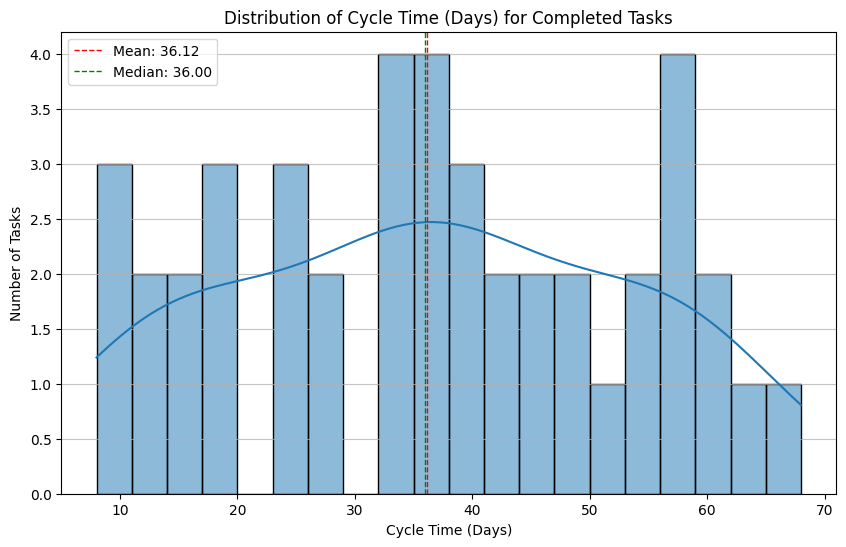


Summary Statistics for 'cycle_time_days' (Completed Tasks):
count    43.000000
mean     36.116279
std      17.011494
min       8.000000
25%      23.500000
50%      36.000000
75%      50.500000
max      68.000000
Name: cycle_time_days, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Visualizing 'cycle_time_days' Distribution for Completed Tasks ---")

# Filter for completed tasks that have a non-NaN cycle_time_days
completed_tasks_with_cycle_time = df_messy_tasks[
    (df_messy_tasks['status'] == 'Completed') &
    (df_messy_tasks['cycle_time_days'].notna())
].copy()

if not completed_tasks_with_cycle_time.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(completed_tasks_with_cycle_time['cycle_time_days'], bins=20, kde=True)
    plt.title('Distribution of Cycle Time (Days) for Completed Tasks')
    plt.xlabel('Cycle Time (Days)')
    plt.ylabel('Number of Tasks')
    plt.grid(axis='y', alpha=0.75)
    plt.axvline(completed_tasks_with_cycle_time['cycle_time_days'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {completed_tasks_with_cycle_time["cycle_time_days"].mean():.2f}')
    plt.axvline(completed_tasks_with_cycle_time['cycle_time_days'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {completed_tasks_with_cycle_time["cycle_time_days"].median():.2f}')
    plt.legend()
    plt.show()
else:
    print("No completed tasks with valid cycle time data to plot.")

# Also print some summary statistics to see the range
print("\nSummary Statistics for 'cycle_time_days' (Completed Tasks):")
print(completed_tasks_with_cycle_time['cycle_time_days'].describe())

### Visualize ```cycle_time_days``` Distribution

In [ ]:
completed_tasks_with_cycle_time =df_messy_tasks[(df_messy_tasks['status']=='Completed')&(df_messy_tasks['cycle_time_days'].notna())]
completed_tasks_with_cycle_time

,task_id,parent_id,project_name,task_name,status,percentage_completion,date_created,start_date,due_date,date_completed,...,last_updated_date,predecessor_task_id,assignee_id,has_predecessor,cycle_time_days,planned_duration_days,time_to_start_days,is_overdue,has_due_date,days_since_last_update
5,T-00006,T-00003,Q3 Product Feature Launch - AI Integration,Database Schema Update - T-00006,Completed,100.0,2024-09-29,2024-10-04,2024-11-23,2024-11-26,...,2025-07-03,NaN,ASS-011,False,58.0,55.0,5.0,False,True,4
6,T-00007,T-00006,Customer Onboarding Flow Optimization,Frontend Bug Fix - T-00007,Completed,100.0,2025-03-04,2025-03-05,2025-03-22,2025-03-18,...,2025-07-06,T-00002,ASS-011,True,14.0,18.0,1.0,False,True,1
18,T-00019,T-00012,Internal Tool Development - Automation Suite,Frontend Bug Fix - T-00019,Completed,100.0,2025-02-25,2025-02-27,2025-04-19,2025-04-25,...,2025-06-25,NaN,ASS-003,False,59.0,53.0,2.0,False,True,12
39,T-00040,No Parent,Website Redesign - User Experience Overhaul,Support Handoff - T-00040,Completed,100.0,2025-03-10,2025-03-11,2025-04-09,2025-04-15,...,2025-06-27,NaN,ASS-009,False,36.0,30.0,1.0,False,True,10
43,T-00044,T-00041,Website Redesign - User Experience Overhaul,Support Handoff - T-00044,Completed,100.0,2024-11-02,2024-11-06,2024-11-29,2024-11-26,...,2025-06-25,NaN,ASS-004,False,24.0,27.0,4.0,False,True,12
45,T-00046,No Parent,Internal Tool Development - Automation Suite,Integrate API - T-00046,Completed,100.0,2024-12-13,2024-12-17,2025-02-01,2025-01-23,...,2025-07-07,NaN,ASS-003,False,41.0,50.0,4.0,False,True,0
48,T-00049,T-00047,Internal Tool Development - Automation Suite,Ad Spend Optimization - T-00049,Completed,100.0,2024-10-26,2024-10-31,2024-12-13,2024-12-10,...,2025-07-05,T-00037,ASS-006,True,45.0,48.0,5.0,False,True,2
57,T-00058,No Parent,Internal Tool Development - Automation Suite,Contract Approval - T-00058,Completed,100.0,2025-03-15,2025-03-21,2025-04-24,2025-04-20,...,2025-06-25,NaN,ASS-009,False,36.0,40.0,6.0,False,True,12
58,T-00059,T-00058,Q3 Product Feature Launch - AI Integration,API Endpoint Creation - T-00059,Completed,100.0,2025-04-13,2025-04-14,2025-04-27,2025-04-27,...,2025-06-27,NaN,ASS-003,False,14.0,14.0,1.0,False,True,10
67,T-00068,T-00067,Holiday Marketing Campaign - Social Media Focus,Performance Report - T-00068,Completed,100.0,2025-03-23,2025-03-29,2025-05-11,2025-05-19,...,2025-07-07,NaN,ASS-004,False,57.0,49.0,6.0,False,True,0


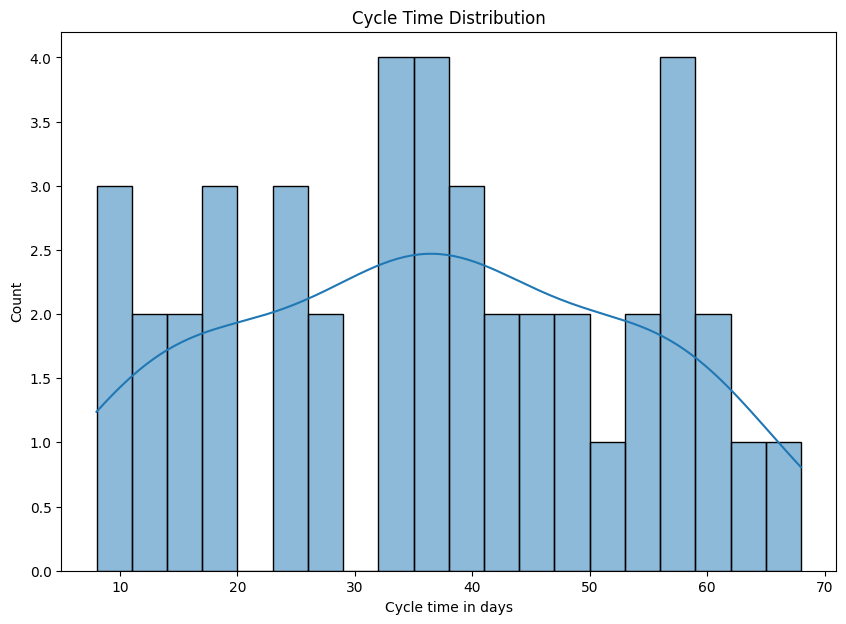

count    43.000000
mean     36.116279
std      17.011494
min       8.000000
25%      23.500000
50%      36.000000
75%      50.500000
max      68.000000
Name: cycle_time_days, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.histplot(data=completed_tasks_with_cycle_time, x='cycle_time_days', bins=20,kde=True)
plt.title('Cycle Time Distribution')
plt.ylabel('Count')
plt.xlabel('Cycle time in days')
plt.show()
print(completed_tasks_with_cycle_time['cycle_time_days'].describe())

### Identify Outliers in ```cycle_time_days```

In [ ]:
ctd_q1 = completed_tasks_with_cycle_time['cycle_time_days'].quantile(0.25)
ctd_q3 = completed_tasks_with_cycle_time['cycle_time_days'].quantile(0.75)
ctd_IQR = ctd_q3-ctd_q1
ctd_LL = ctd_q1-1.5* ctd_IQR
ctd_UL = ctd_q3+1.5*ctd_IQR

print(f"Q1 (25th percentile): {ctd_q1:.2f} days")
print(f"Q3 (75th percentile): {ctd_q3:.2f} days")
print(f"IQR: {ctd_IQR:.2f} days")
print(f"Upper Bound for Outliers (Q3 + 1.5 * IQR): {ctd_UL:.2f} days")
# print(ctd_LL)
# Identify the cycle times that are higher than UL or lower than Lower limit
outlier_masks= completed_tasks_with_cycle_time['cycle_time_days']>ctd_UL
outlier_tasks = completed_tasks_with_cycle_time[outlier_masks]
if not outlier_tasks.empty:
    print("\nDetails of identified outlier tasks:")
    print(outlier_tasks[['task_id', 'status', 'task_type', 'complexity_points', 'date_created', 'date_completed', 'cycle_time_days']].sort_values(by='cycle_time_days', ascending=False))
else:
    print("No outlier tasks found based on the IQR method for cycle_time_days.")


Q1 (25th percentile): 23.50 days
Q3 (75th percentile): 50.50 days
IQR: 27.00 days
Upper Bound for Outliers (Q3 + 1.5 * IQR): 91.00 days
No outlier tasks found based on the IQR method for cycle_time_days.


### Visualize Time Tracked Hours Distribution

In [ ]:
# Time Tracked Hours

df_messy_tasks[df_messy_tasks['status']!='To Do']['time_tracked_hours'].value_counts(dropna=False).reset_index().sort_values(by='time_tracked_hours')

,time_tracked_hours,count
75,0.20,1
54,0.60,1
105,0.70,1
100,1.00,1
141,1.60,1
...,...,...
123,36.65,1
83,37.50,1
138,37.90,1
108,38.10,1


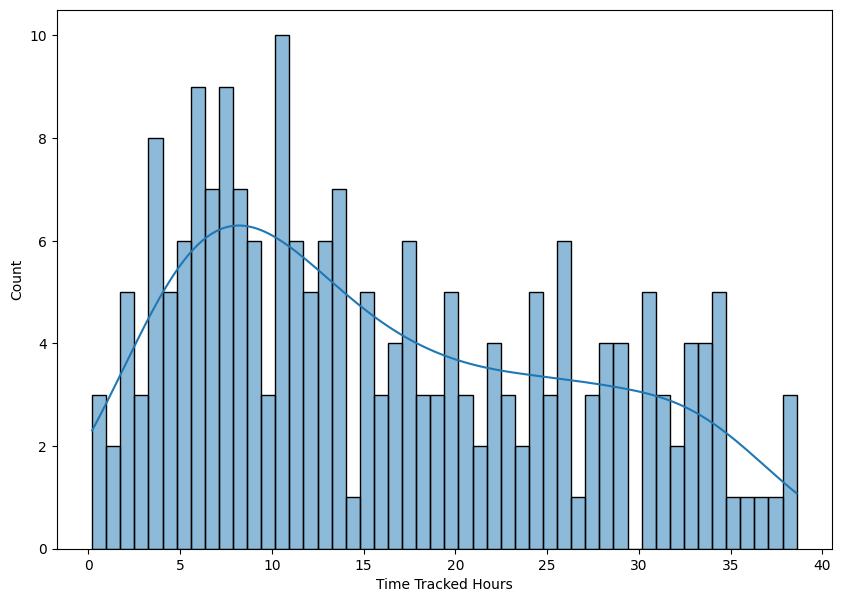

,time_tracked_hours
count,207.000000
mean,16.188164
std,10.292916
min,0.200000
25%,7.400000
50%,13.500000
75%,24.625000
max,38.600000


In [ ]:
time_tacked_hours_df = df_messy_tasks[df_messy_tasks['status']!='To Do']
plt.figure(figsize=(10,7))
sns.histplot(data=time_tacked_hours_df, x='time_tracked_hours', bins=50,kde=True)
plt.xlabel('Time Tracked Hours')
plt.ylabel('Count')
plt.show()

time_tacked_hours_df['time_tracked_hours'].describe()

In [ ]:
tth_q1 = time_tacked_hours_df['time_tracked_hours'].quantile(0.25)
tth_q3 = time_tacked_hours_df['time_tracked_hours'].quantile(0.75)

tth_IQR = tth_q3-tth_q1
tth_UL= tth_q3 + 1.5*tth_IQR
tth_LL= tth_q1 - 1.5*tth_IQR

print('Lower limit: ', tth_LL)
print('Upper limit: ', tth_UL)
print('IQR: ', tth_IQR)
print('Q1: ', tth_q1)
print('Q3: ', tth_q3)

Lower limit:  -18.4375
Upper limit:  50.462500000000006
IQR:  17.225
Q1:  7.4
Q3:  24.625


In [ ]:
time_tracked_mask = time_tacked_hours_df['time_tracked_hours']>tth_UL
time_tracked_tasks = time_tacked_hours_df[time_tracked_mask]
time_tracked_tasks

,task_id,parent_id,project_name,task_name,status,percentage_completion,date_created,start_date,due_date,date_completed,...,last_updated_date,predecessor_task_id,assignee_id,has_predecessor,cycle_time_days,planned_duration_days,time_to_start_days,is_overdue,has_due_date,days_since_last_update


### Relationship between ```complexity_points``` and time metrics

In [ ]:
# Complexity Points by time to start days
complexity_points_by_time_to_start_days=df_messy_tasks.groupby('complexity_points')['time_to_start_days'].mean().reset_index()
complexity_points_by_time_to_start_days

,complexity_points,time_to_start_days
0,1,3.418182
1,2,3.764706
2,3,3.620690
3,4,3.371429
4,5,3.456140


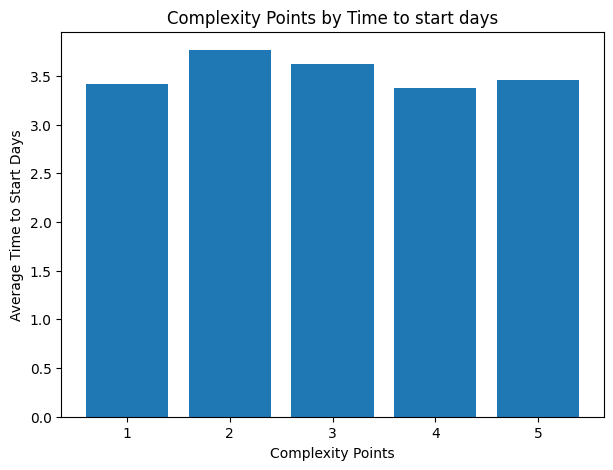

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(x=complexity_points_by_time_to_start_days.complexity_points, height=complexity_points_by_time_to_start_days['time_to_start_days'])
plt.title('Complexity Points by Time to start days')
plt.xlabel('Complexity Points')
plt.ylabel('Average Time to Start Days')
plt.show()

Insight: There is no clear correlation between complexity_points and the average time_to_start_days. Tasks, regardless of their perceived complexity, seem to sit in the backlog for a very similar duration (around 3.4 to 3.8 days) before work begins.

Implication: This suggests that tasks might not be prioritized or picked up based on their complexity, or that the intake process is efficient enough that all tasks are started relatively quickly.

In [ ]:
df_non_todo_tasks = df_messy_tasks[df_messy_tasks['status']!='To Do']
# Complexity Points by 'time_tracked_hours'
complexity_points_by_time_tracked_hours=df_non_todo_tasks.groupby('complexity_points')['time_tracked_hours'].mean().reset_index()
complexity_points_by_time_tracked_hours

,complexity_points,time_tracked_hours
0,1,17.397619
1,2,16.766327
2,3,14.626596
3,4,11.016071
4,5,19.580488


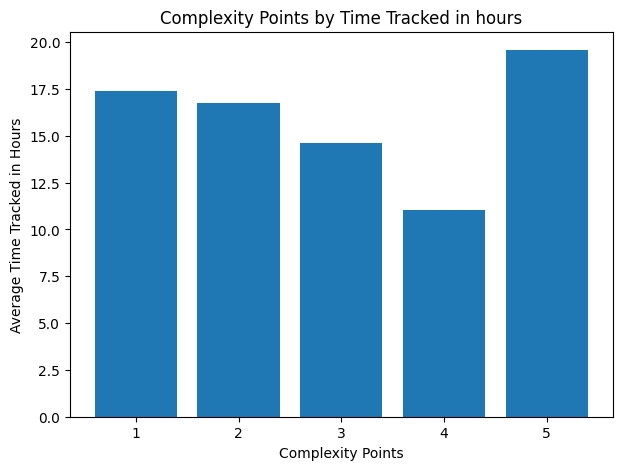

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(x=complexity_points_by_time_tracked_hours.complexity_points, height=complexity_points_by_time_tracked_hours['time_tracked_hours'])
plt.title('Complexity Points by Time Tracked in hours')
plt.xlabel('Complexity Points')
plt.ylabel('Average Time Tracked in Hours')
plt.show()

Insight: This is surprising! We would intuitively expect time_tracked_hours to generally increase with complexity_points. However, your data shows complexity_points=4 has the lowest average time tracked, and complexity_points=5 is not significantly higher than complexity_points=1.

Implication: This is a major finding for the project manager. It suggests that:

  - Complexity_points might not be assigned accurately or consistently.

- There might be other factors (e.g., task_type, assignee_id, specific project_name) that influence time_tracked_hours more than complexity_points.

- Perhaps very complex tasks (complexity_points=5) are being broken down into smaller sub-tasks, and only parts are being tracked here, or the team is exceptionally efficient at them.

In [ ]:
df_completed_tasks = df_messy_tasks[df_messy_tasks['status']=='Completed']
# Complexity Points by 'cycle_time_days'
complexity_points_by_cycle_time_days=df_completed_tasks.groupby('complexity_points')['cycle_time_days'].mean().reset_index()
complexity_points_by_cycle_time_days

,complexity_points,cycle_time_days
0,1,37.357143
1,2,25.250000
2,3,41.888889
3,4,47.333333
4,5,31.538462


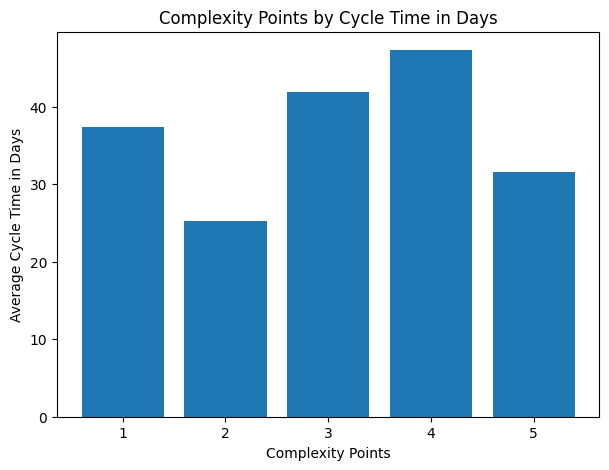

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(x=complexity_points_by_cycle_time_days.complexity_points, height=complexity_points_by_cycle_time_days['cycle_time_days'])
plt.title('Complexity Points by Cycle Time in Days')
plt.xlabel('Complexity Points')
plt.ylabel('Average Cycle Time in Days')
plt.show()

This is even more striking! complexity_points=2 tasks are completed significantly faster than others, and complexity_points=5 tasks are also completed relatively quickly, while complexity_points=4 tasks take the longest. This strongly suggests that complexity_points is not a linear or even consistently monotonic predictor of task duration in this dataset.

In [ ]:
df_messy_tasks.columns

Index(['task_id', 'parent_id', 'project_name', 'task_name', 'status',
       'percentage_completion', 'date_created', 'start_date', 'due_date',
       'date_completed', 'time_tracked_hours', 'task_type',
       'complexity_points', 'priority', 'blocker_reason',
       'quality_review_status', 'last_updated_date', 'predecessor_task_id',
       'assignee_id', 'has_predecessor', 'cycle_time_days',
       'planned_duration_days', 'time_to_start_days', 'is_overdue',
       'has_due_date', 'days_since_last_update'],
      dtype='object')

In [ ]:
# Complexity Points by 'planned_duration_days'
complexity_points_by_planned_duration_days=df_messy_tasks.groupby('complexity_points')['planned_duration_days'].mean().reset_index()
complexity_points_by_planned_duration_days

,complexity_points,planned_duration_days
0,1,37.472727
1,2,37.746269
2,3,43.438596
3,4,40.454545
4,5,33.109091


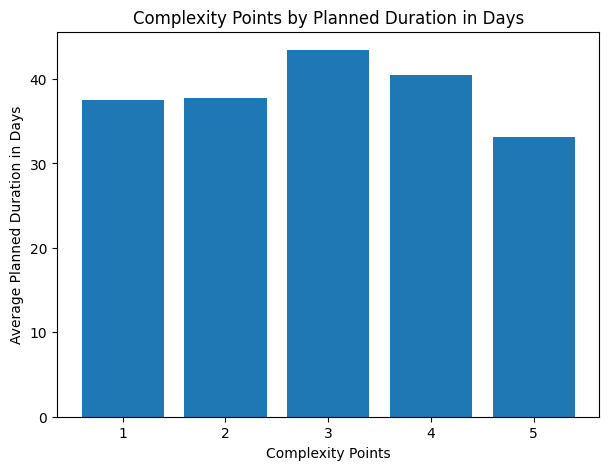

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(x=complexity_points_by_planned_duration_days.complexity_points, height=complexity_points_by_planned_duration_days['planned_duration_days'])
plt.title('Complexity Points by Planned Duration in Days')
plt.xlabel('Complexity Points')
plt.ylabel('Average Planned Duration in Days')
plt.show()

Insight: This mirrors the cycle_time_days pattern somewhat, with complexity_points=5 having the shortest planned duration.

Implication: This suggests that the planning itself might not be consistently reflecting the true complexity, or that highly complex tasks are being planned with aggressive (perhaps unrealistic) timelines.

In [ ]:
# Complexity Points by 'days_since_last_update'
complexity_points_by_days_since_last_update=df_messy_tasks.groupby('complexity_points')['days_since_last_update'].mean().reset_index()
complexity_points_by_days_since_last_update

,complexity_points,days_since_last_update
0,1,8.109091
1,2,7.088235
2,3,6.758621
3,4,7.371429
4,5,7.035088


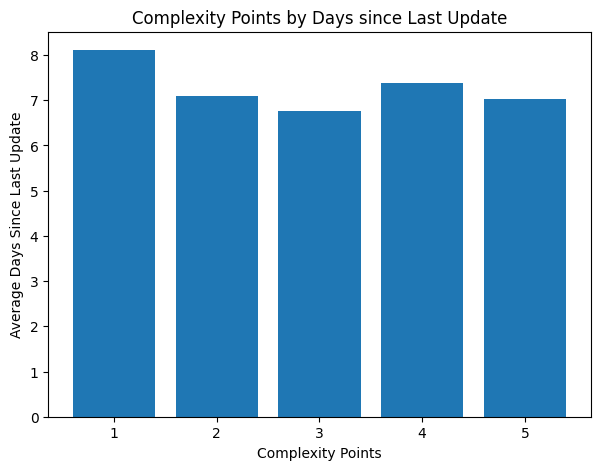

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(x=complexity_points_by_days_since_last_update.complexity_points, height=complexity_points_by_days_since_last_update['days_since_last_update'])
plt.title('Complexity Points by Days since Last Update')
plt.xlabel('Complexity Points')
plt.ylabel('Average Days Since Last Update')
plt.show()

Insight: This mirrors the cycle_time_days pattern somewhat, with complexity_points=5 having the shortest planned duration.

Implication: This suggests that the planning itself might not be consistently reflecting the true complexity, or that highly complex tasks are being planned with aggressive (perhaps unrealistic) timelines.

In [ ]:
df_messy_tasks.columns

Index(['task_id', 'parent_id', 'project_name', 'task_name', 'status',
       'percentage_completion', 'date_created', 'start_date', 'due_date',
       'date_completed', 'time_tracked_hours', 'task_type',
       'complexity_points', 'priority', 'blocker_reason',
       'quality_review_status', 'last_updated_date', 'predecessor_task_id',
       'assignee_id', 'has_predecessor', 'cycle_time_days',
       'planned_duration_days', 'time_to_start_days', 'is_overdue',
       'has_due_date', 'days_since_last_update'],
      dtype='object')

### Relationship between Task Types and time metrics

In [ ]:
# Complexity Points by time to start days
task_type_by_planned_duration_days=df_messy_tasks.groupby('task_type')['planned_duration_days'].mean().reset_index().sort_values(by='planned_duration_days')
task_type_by_planned_duration_days

/tmp/ipython-input-301-2419234949.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  task_type_by_planned_duration_days=df_messy_tasks.groupby('task_type')['planned_duration_days'].mean().reset_index().sort_values(by='planned_duration_days')


,task_type,planned_duration_days
3,Deployment & Release,31.782609
5,Development (Backend),35.703704
0,Analytics & Reporting,36.806452
11,Strategy & Planning,37.037037
9,PMO & Coordination,37.312500
8,Marketing & Promotion,37.478261
1,Content Creation,38.200000
10,QA & Testing,38.454545
4,Design & UX,39.357143
2,Customer Support Prep,40.892857


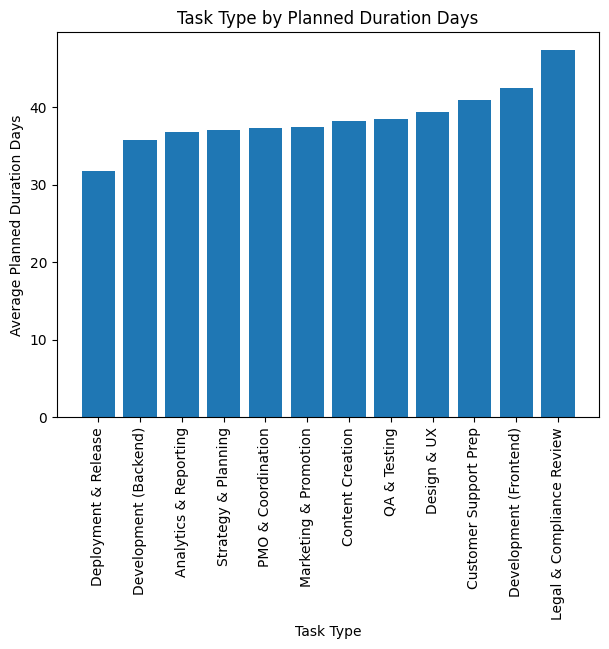

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(x=task_type_by_planned_duration_days.task_type, height=task_type_by_planned_duration_days['planned_duration_days'])
plt.title('Task Type by Planned Duration Days')
plt.xticks(rotation=90)
plt.xlabel('Task Type')
plt.ylabel('Average Planned Duration Days')
plt.show()

Insight: Legal & Compliance Review tasks have the longest planned duration, which you correctly noted is understandable due to inherent complexities and verification steps. Deployment & Release tasks have the shortest planned duration. This suggests planning is somewhat aligned with perceived complexity for these extremes.

In [ ]:
df_non_todo_tasks = df_messy_tasks[df_messy_tasks['status']!='To Do']
# Complexity Points by 'time_tracked_hours'
task_type_by_time_tracked_hours=df_non_todo_tasks.groupby('task_type')['time_tracked_hours'].mean().reset_index().sort_values(by='time_tracked_hours')
task_type_by_time_tracked_hours

/tmp/ipython-input-303-3726233936.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  task_type_by_time_tracked_hours=df_non_todo_tasks.groupby('task_type')['time_tracked_hours'].mean().reset_index().sort_values(by='time_tracked_hours')


,task_type,time_tracked_hours
10,QA & Testing,12.241176
0,Analytics & Reporting,13.847826
2,Customer Support Prep,13.908000
11,Strategy & Planning,14.625000
8,Marketing & Promotion,15.211111
6,Development (Frontend),15.535714
3,Deployment & Release,16.387500
1,Content Creation,16.907692
9,PMO & Coordination,17.238889
4,Design & UX,18.095455


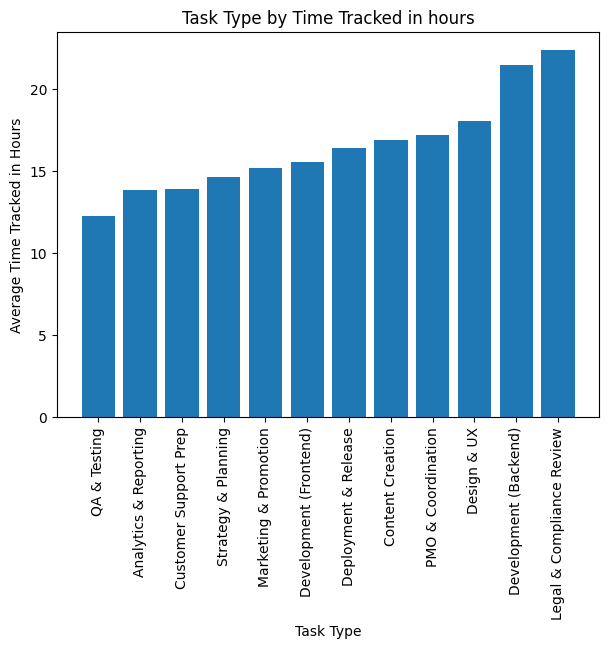

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(x=task_type_by_time_tracked_hours.task_type, height=task_type_by_time_tracked_hours['time_tracked_hours'])
plt.title('Task Type by Time Tracked in hours')
plt.xticks(rotation=90)
plt.xlabel('Task Type')
plt.ylabel('Average Time Tracked in Hours')
plt.show()

Insight: Again, Legal & Compliance Review tasks demand the most time_tracked_hours, aligning with their long planned duration. QA & Testing tasks have the lowest average time tracked. This indicates that actual effort generally aligns with the planning for the most and least demanding task types.

In [ ]:
df_completed_tasks = df_messy_tasks[df_messy_tasks['status']=='Completed']
# Complexity Points by 'cycle_time_days'
# complexity_points_by_=df_completed_tasks.groupby('complexity_points')['cycle_time_days'].mean().reset_index()
# complexity_points_by_cycle_time_days

task_type_by_cycle_time_days=df_completed_tasks.groupby('task_type')['cycle_time_days'].mean().reset_index().sort_values(by='cycle_time_days')
task_type_by_cycle_time_days

/tmp/ipython-input-305-2945050933.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  task_type_by_cycle_time_days=df_completed_tasks.groupby('task_type')['cycle_time_days'].mean().reset_index().sort_values(by='cycle_time_days')


,task_type,cycle_time_days
5,Development (Backend),26.000000
8,Marketing & Promotion,31.750000
6,Development (Frontend),33.250000
7,Legal & Compliance Review,34.000000
10,QA & Testing,35.500000
3,Deployment & Release,36.333333
11,Strategy & Planning,37.666667
1,Content Creation,39.500000
4,Design & UX,41.000000
2,Customer Support Prep,42.000000


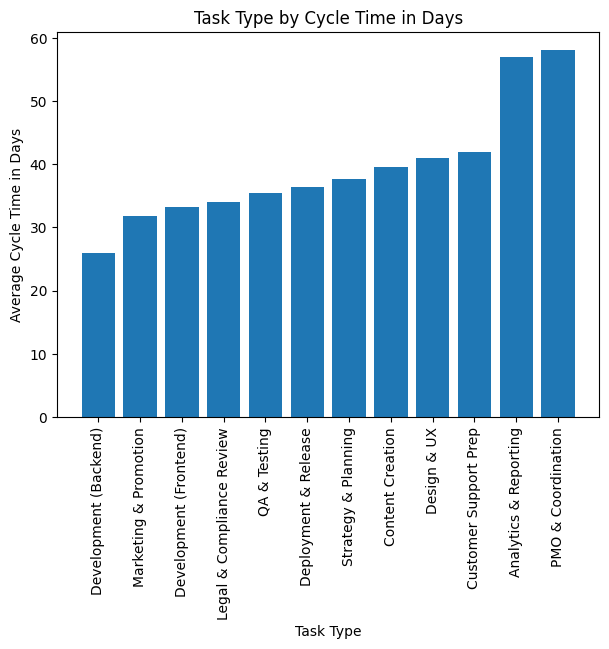

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(x=task_type_by_cycle_time_days.task_type, height=task_type_by_cycle_time_days['cycle_time_days'])
plt.title('Task Type by Cycle Time in Days')
plt.xticks(rotation=90)
plt.xlabel('Task Type')
plt.ylabel('Average Cycle Time in Days')
plt.show()

Insight: This is where it gets very interesting!

Development (Backend) tasks now show the shortest average cycle time (26.0 days), which is a positive sign for development efficiency.

PMO & Coordination and Analytics & Reporting tasks have the longest average cycle times (58.0 and 57.0 days, respectively). This is a critical finding!

Your previous observation about Design & UX having max cycle time was based on the slightly incorrect filter. With the correct filter, Design & UX is still on the longer side (41.0 days), but not the longest.

Legal & Compliance Review tasks, despite having the longest planned duration and most time_tracked_hours, are actually completed in a relatively average cycle time (34.0 days), suggesting they might be prioritized or have efficient completion processes once the work is actively being done.

### New KPI - Active cycle time = (task complete date - task start date)

In [ ]:
df_messy_tasks['active_cycle_time']= (df_messy_tasks['date_completed']-df_messy_tasks['start_date']).dt.days.astype(float)
df_messy_tasks[['status','active_cycle_time']].head(10)

,status,active_cycle_time
0,To Do,NaN
1,Review,28.0
2,Review,14.0
3,To Do,NaN
4,To Do,NaN
5,Completed,53.0
6,Completed,13.0
7,Review,44.0
8,To Do,NaN
9,To Do,NaN


In [ ]:
df_messy_tasks['overdue_days'] = (df_messy_tasks['date_completed'] - df_messy_tasks['due_date']).dt.days
df_messy_tasks['overdue_days'].head()

,overdue_days
0,NaN
1,-2.0
2,3.0
3,NaN
4,NaN


In [ ]:
import numpy as np

# Calculate the raw difference in days. This will be NaN for incomplete tasks or tasks without due dates.
# It will be negative for tasks completed early.
raw_overdue_diff = (df_messy_tasks['date_completed'] - df_messy_tasks['due_date']).dt.days

# Initialize overdue_days to 0 for all tasks
df_messy_tasks['overdue_days'] = 0

# Apply the logic: if is_overdue is True, then use the positive raw_overdue_diff
# Otherwise, it remains 0
df_messy_tasks['overdue_days'] = np.where(
    df_messy_tasks['is_overdue'] == True,
    raw_overdue_diff,
    0
)

# A small edge case: if a task is not overdue but raw_overdue_diff was NaN (e.g., no due date),
# np.where might still result in NaN if raw_overdue_diff was NaN.
# Let's ensure any remaining NaNs in overdue_days (which should only come from raw_overdue_diff being NaN
# for non-overdue tasks) are set to 0.
df_messy_tasks['overdue_days'] = df_messy_tasks['overdue_days'].fillna(0)

# Ensure it's a numeric type (float is fine for potential future calculations)
df_messy_tasks['overdue_days'] = df_messy_tasks['overdue_days'].astype(float)

# Display a sample to verify
print(df_messy_tasks[['due_date', 'date_completed', 'is_overdue', 'overdue_days']].head(10))

    due_date date_completed  is_overdue  overdue_days
0 2024-10-14            NaT        True           0.0
1 2024-08-23     2024-08-21        True          -2.0
2 2024-11-24     2024-11-27        True           3.0
3 2025-04-20            NaT        True           0.0
4 2024-08-28            NaT        True           0.0
5 2024-11-23     2024-11-26       False           0.0
6 2025-03-22     2025-03-18       False           0.0
7 2025-01-22     2025-01-17        True          -5.0
8 2025-01-11            NaT        True           0.0
9 2025-04-03            NaT        True           0.0


In [ ]:
import numpy as np

# Calculate the raw difference in days. This will be NaN for incomplete tasks or tasks without due dates.
# It will be negative for tasks completed early.
raw_overdue_diff = (df_messy_tasks['date_completed'] - df_messy_tasks['due_date']).dt.days

# overdue_days should be 0 if the task is not completed, completed early, or has no due date.
# Otherwise, it's the positive number of days late.
df_messy_tasks['overdue_days'] = np.where(
    (df_messy_tasks['status'] == 'Completed') & # Only consider completed tasks for this calculation
    (raw_overdue_diff > 0), # And only if they are actually late
    raw_overdue_diff,
    0 # Otherwise, 0 days overdue
)

# Ensure it's a numeric type (float is fine for potential future calculations)
df_messy_tasks['overdue_days'] = df_messy_tasks['overdue_days'].astype(float)

# Display a sample to verify
print(df_messy_tasks[['due_date', 'date_completed', 'is_overdue', 'overdue_days']].head(10))

    due_date date_completed  is_overdue  overdue_days
0 2024-10-14            NaT        True           0.0
1 2024-08-23     2024-08-21        True           0.0
2 2024-11-24     2024-11-27        True           0.0
3 2025-04-20            NaT        True           0.0
4 2024-08-28            NaT        True           0.0
5 2024-11-23     2024-11-26       False           3.0
6 2025-03-22     2025-03-18       False           0.0
7 2025-01-22     2025-01-17        True           0.0
8 2025-01-11            NaT        True           0.0
9 2025-04-03            NaT        True           0.0


In [ ]:
import numpy as np
import pandas as pd

# Assuming df_messy_tasks is already loaded and contains the date columns

# --- Step 1: Re-evaluate 'is_overdue' for COMPLETED tasks ---
# For tasks that are 'Completed', 'is_overdue' should be True if date_completed > due_date
# and False otherwise (completed on time or early).
completed_mask = df_messy_tasks['status'] == 'Completed'

# Apply this logic only to completed tasks
df_messy_tasks.loc[completed_mask, 'is_overdue'] = (
    df_messy_tasks.loc[completed_mask, 'date_completed'] > df_messy_tasks.loc[completed_mask, 'due_date']
)

# --- Step 2: Calculate 'overdue_days' ---
# This KPI should represent the number of days a task was late, if it was late.
# It should be 0 for tasks completed on time, early, or not yet completed.

# Calculate the raw difference in days. This will be NaN for incomplete tasks or tasks without due dates.
# It will be negative for tasks completed early.
raw_overdue_diff = (df_messy_tasks['date_completed'] - df_messy_tasks['due_date']).dt.days

# Initialize 'overdue_days' column to 0.0
df_messy_tasks['overdue_days'] = 0.0

# Use np.where to set 'overdue_days' based on conditions:
# Condition: Task is 'Completed' AND its 'date_completed' is AFTER its 'due_date'
# If True: Use the positive raw difference
# If False: Set to 0.0 (covers tasks completed on time/early, or not yet completed)
df_messy_tasks['overdue_days'] = np.where(
    (df_messy_tasks['status'] == 'Completed') & (df_messy_tasks['date_completed'] > df_messy_tasks['due_date']),
    raw_overdue_diff,
    0.0
)

# Ensure the column is float type
df_messy_tasks['overdue_days'] = df_messy_tasks['overdue_days'].astype(float)

# --- Display a sample to verify the results ---
print(df_messy_tasks[['due_date', 'date_completed', 'status', 'is_overdue', 'overdue_days']].head(10))



    due_date date_completed     status  is_overdue  overdue_days
0 2024-10-14            NaT      To Do        True           0.0
1 2024-08-23     2024-08-21     Review        True           0.0
2 2024-11-24     2024-11-27     Review        True           0.0
3 2025-04-20            NaT      To Do        True           0.0
4 2024-08-28            NaT      To Do        True           0.0
5 2024-11-23     2024-11-26  Completed        True           3.0
6 2025-03-22     2025-03-18  Completed       False           0.0
7 2025-01-22     2025-01-17     Review        True           0.0
8 2025-01-11            NaT      To Do        True           0.0
9 2025-04-03            NaT      To Do        True           0.0


In [ ]:
import numpy as np
import pandas as pd


# --- Step 1: Ensure date columns are datetime objects ---
# This is crucial for accurate date comparisons and arithmetic
df_messy_tasks['date_created'] = pd.to_datetime(df_messy_tasks['date_created'], errors='coerce')
df_messy_tasks['start_date'] = pd.to_datetime(df_messy_tasks['start_date'], errors='coerce')
df_messy_tasks['due_date'] = pd.to_datetime(df_messy_tasks['due_date'], errors='coerce')
df_messy_tasks['date_completed'] = pd.to_datetime(df_messy_tasks['date_completed'], errors='coerce')
df_messy_tasks['last_updated_date'] = pd.to_datetime(df_messy_tasks['last_updated_date'], errors='coerce')

# Define the reference date (e.g., the latest update in your dataset).
# This acts as "today" for checking if non-completed tasks are overdue.
reference_date = df_messy_tasks['last_updated_date'].max()

# --- Step 2: Re-evaluate 'is_overdue' for ALL tasks consistently ---
# Initialize 'is_overdue' to False for all tasks
df_messy_tasks['is_overdue'] = False

# Condition 1: Task is Completed AND date_completed is AFTER due_date
completed_overdue_mask = (
    (df_messy_tasks['status'] == 'Completed') &
    (df_messy_tasks['date_completed'].notna()) &
    (df_messy_tasks['due_date'].notna()) &
    (df_messy_tasks['date_completed'] > df_messy_tasks['due_date'])
)
df_messy_tasks.loc[completed_overdue_mask, 'is_overdue'] = True

# Condition 2: Task is NOT Completed AND due_date is in the past relative to reference_date
# This captures tasks that are currently open but past their deadline.
not_completed_overdue_mask = (
    (df_messy_tasks['status'] != 'Completed') &
    (df_messy_tasks['due_date'].notna()) &
    (df_messy_tasks['due_date'] < reference_date)
)
df_messy_tasks.loc[not_completed_overdue_mask, 'is_overdue'] = True


# --- Step 3: Calculate 'overdue_days' ---
# This KPI should represent the number of days a task was late, if it was late.
# It should be 0 for tasks completed on time, early, or not yet completed.

# Calculate days_late_if_completed (can be negative or NaN). Fill NaNs with 0.
days_late_if_completed = (df_messy_tasks['date_completed'] - df_messy_tasks['due_date']).dt.days.fillna(0)

# Calculate days_late_if_not_completed (can be negative or NaN). Fill NaNs with 0.
days_late_if_not_completed = (reference_date - df_messy_tasks['due_date']).dt.days.fillna(0)

# Determine the potential overdue days based on status
# This result will be a numpy array, but NaNs have already been handled by fillna(0) above
potential_overdue_days = np.where(
    df_messy_tasks['status'] == 'Completed',
    days_late_if_completed,
    days_late_if_not_completed
)

# Now apply the 'is_overdue' condition and ensure non-negativity.
# np.maximum(0, ...) ensures no negative overdue days.
df_messy_tasks['overdue_days'] = np.where(
    df_messy_tasks['is_overdue'] == True, # If the task is marked as overdue by our consistent logic
    np.maximum(0, potential_overdue_days), # Use the calculated potential overdue days, ensuring non-negativity
    0.0 # If not overdue, then 0 days overdue
)

# Ensure the column is float type
df_messy_tasks['overdue_days'] = df_messy_tasks['overdue_days'].astype(float)

# --- Display a sample to verify the results ---
print(df_messy_tasks[['due_date', 'date_completed', 'status', 'is_overdue', 'overdue_days']].head(10))


    due_date date_completed     status  is_overdue  overdue_days
0 2024-10-14            NaT      To Do        True         266.0
1 2024-08-23     2024-08-21     Review        True         318.0
2 2024-11-24     2024-11-27     Review        True         225.0
3 2025-04-20            NaT      To Do        True          78.0
4 2024-08-28            NaT      To Do        True         313.0
5 2024-11-23     2024-11-26  Completed        True           3.0
6 2025-03-22     2025-03-18  Completed       False           0.0
7 2025-01-22     2025-01-17     Review        True         166.0
8 2025-01-11            NaT      To Do        True         177.0
9 2025-04-03            NaT      To Do        True          95.0


### Bottle neck analysis for PMO & Coordination and Analytics & Reporting

In [ ]:
# Create a filtered DataFrame containing only tasks where task_type is either 'PMO & Coordination' or 'Analytics & Reporting'.
PMO_Coordination_Analytics_Reporting= df_messy_tasks[(df_messy_tasks['task_type']=='PMO & Coordination') | (df_messy_tasks['task_type']=='Analytics & Reporting')].copy()
PMO_Coordination_Analytics_Reporting['task_type'].value_counts()

,count
task_type,
Analytics & Reporting,31
PMO & Coordination,17
Customer Support Prep,0
Content Creation,0
Deployment & Release,0
Design & UX,0
Development (Frontend),0
Development (Backend),0
Legal & Compliance Review,0


In [ ]:
# From this filtered DataFrame, get the value_counts(normalize=True) for the status column.
PMO_Coordination_Analytics_Reporting.groupby('task_type')['status'].value_counts(normalize=True).reset_index().sort_values(by=['proportion','task_type'], ascending=False)

/tmp/ipython-input-314-2676313174.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  PMO_Coordination_Analytics_Reporting.groupby('task_type')['status'].value_counts(normalize=True).reset_index().sort_values(by=['proportion','task_type'], ascending=False)


,task_type,status,proportion
45,PMO & Coordination,To Do,0.470588
0,Analytics & Reporting,Review,0.419355
1,Analytics & Reporting,To Do,0.258065
2,Analytics & Reporting,Blocked,0.193548
46,PMO & Coordination,In Progress,0.176471
47,PMO & Coordination,Review,0.176471
48,PMO & Coordination,Blocked,0.117647
3,Analytics & Reporting,In Progress,0.096774
49,PMO & Coordination,Completed,0.058824
4,Analytics & Reporting,Completed,0.032258


Status Distribution for Bottleneck Task Types:

**1. Analytics & Reporting Tasks:**

- Review: 41.94% (Highest proportion)

- To Do: 25.81%

- Blocked: 19.35%

- In Progress: 9.68%

- Completed: 3.23% (Lowest proportion)

  **Insight:** A striking 41.94% of Analytics & Reporting tasks are in the 'Review' status. This is a very high proportion compared to 'Completed' (only 3.23%).

  **Implication:** This strongly suggests that the review process itself is a major bottleneck for Analytics & Reporting tasks. They are getting stuck in review, indicating potential issues with:

  - Slow reviewer availability.

  - Multiple review cycles needed.

  - Frequent rework requests after review.

  - Lack of clear acceptance criteria.

  - Additionally, a significant portion are in 'To Do' (25.81%) and 'Blocked' (19.35%), also contributing to delays.

**2. PMO & Coordination Tasks:**

- To Do: 47.06% (Highest proportion)

- In Progress: 17.65%

- Review: 17.65%

- Blocked: 11.76%

- Completed: 5.88% (Lowest proportion)

- Insight: Nearly half ( 47.06% ) of PMO & Coordination tasks are in the 'To Do' status.

  **Implication:** This points to a significant issue with backlog management, prioritization, or initial resource allocation/availability for PMO & Coordination tasks. They are sitting in the backlog for a long time before work even begins, directly contributing to their long overall cycle time.

  - 'In Progress' and 'Review' also contribute, but the 'To Do' backlog is the most dominant factor here.

**Overall Conclusion from Status Distribution:**

You've identified two distinct primary bottlenecks for these high-cycle-time task types:

- Analytics & Reporting: Primarily bottlenecked in the 'Review' phase.

- PMO & Coordination: Primarily bottlenecked in the 'To Do' (backlog/waiting) phase.

This is incredibly valuable information for a project manager! It tells them exactly where to focus their efforts to improve flow and reduce delays for these specific types of tasks.



In [ ]:
# From this filtered DataFrame, get the value_counts(normalize=True) for the status column.
PMO_Coordination_Analytics_Reporting[PMO_Coordination_Analytics_Reporting['status']=='Blocked'][['task_type','blocker_reason']].value_counts(normalize=True).reset_index()
# .sort_values(by=['proportion','task_type'], ascending=False)

,task_type,blocker_reason,proportion
0,Analytics & Reporting,Unknown Blocker Reason,0.625
1,PMO & Coordination,Unknown Blocker Reason,0.250
2,Analytics & Reporting,Design Approval Needed,0.125


**Insights from blocker_reason Analysis:**
- Analytics & Reporting Blockers:

  - Unknown Blocker Reason: 62.5%

  - Design Approval Needed: 12.5%

  **Interpretation:** The overwhelming majority of Analytics & Reporting tasks that are blocked have an "Unknown Blocker Reason." This is a critical data integrity issue for understanding bottlenecks. If the reason isn't logged, it's impossible to address the root cause. The "Design Approval Needed" is a specific, actionable blocker.

- PMO & Coordination Blockers:

  - Unknown Blocker Reason: 25%

  **Interpretation:** A quarter of PMO & Coordination blocked tasks also have an "Unknown Blocker Reason." This indicates a similar data logging problem, though less severe than for Analytics tasks.

**Overall Conclusion from blocker_reason:**
While we identified that a portion of Analytics & Reporting (19.35%) and PMO & Coordination (11.76%) tasks are 'Blocked', the high proportion of "**Unknown Blocker Reason**" significantly hinders our ability to pinpoint specific actionable causes for these blocks.

This highlights a data collection gap that directly impacts the ability to perform root cause analysis for blocked tasks.

### ```planned_duration_days``` to their ```active_cycle_time_days``` (and ```cycle_time_days```) for completed tasks of these types.

In [ ]:
PMO_Coordination_Analytics_Reporting.groupby('task_type')[['planned_duration_days','active_cycle_time','cycle_time_days']].mean().reset_index().sort_values(by='active_cycle_time')

/tmp/ipython-input-316-1765461772.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  PMO_Coordination_Analytics_Reporting.groupby('task_type')[['planned_duration_days','active_cycle_time','cycle_time_days']].mean().reset_index().sort_values(by='active_cycle_time')


,task_type,planned_duration_days,active_cycle_time,cycle_time_days
9,PMO & Coordination,37.312500,29.000000,33.000000
0,Analytics & Reporting,36.806452,30.083333,33.416667
1,Content Creation,NaN,NaN,NaN
2,Customer Support Prep,NaN,NaN,NaN
3,Deployment & Release,NaN,NaN,NaN
4,Design & UX,NaN,NaN,NaN
5,Development (Backend),NaN,NaN,NaN
6,Development (Frontend),NaN,NaN,NaN
7,Legal & Compliance Review,NaN,NaN,NaN
8,Marketing & Promotion,NaN,NaN,NaN


### Summary of Diagnostic Analysis
**1. PMO & Coordination Tasks:**

- The active_cycle_time_days (29.0 days) is shorter than the planned_duration_days (37.3 days). This suggests that once work actually begins on PMO & Coordination tasks, *the team is quite efficient and completes them faster than planned.*

- However, the total cycle time (33.0 days) is still significantly longer than the active cycle time. The difference between cycle_time_days (33.0) and active_cycle_time_days (29.0) is 4 days.

- **The key takeaway here, combined with our earlier finding that 47.06% are 'To Do', is that the primary delay for PMO & Coordination tasks is the time they spend in the backlog before work even starts.** Once they're picked up, they move efficiently.

**2. Analytics & Reporting Tasks:**

- Interpretation: Similar to PMO tasks, the active_cycle_time_days (~30.1 days) is shorter than the planned_duration_days (nearly 36.8 days). This also suggests efficiency once active work begins.

- The difference between cycle_time_days (33.4) and active_cycle_time_days (30.1) is ~3.3 days.

- **Combined with our earlier finding that 41.94% are stuck in 'Review', this implies that while the active work phase is efficient, a significant portion of their total cycle time is spent in the 'Review' phase, or potentially waiting to be started (25.81% 'To Do').**



----

**Overall Synthesis of Bottleneck Analysis:**

- PMO & Coordination: The main bottleneck is tasks sitting in the 'To Do' (backlog) status for too long before work commences. Once started, they are completed efficiently.

- Analytics & Reporting: The primary bottleneck is tasks getting stuck in the 'Review' status, indicating potential issues with review processes, feedback loops, or rework cycles. There's also a significant backlog component.

- Data Quality Gap: For both, the high proportion of 'Unknown Blocker Reason' for blocked tasks is a data collection issue that hinders further root cause analysis for those specific blocks.


**Phase 4: Diagnostic Analysis Summary - Key Insights**

This diagnostic analysis aimed to uncover patterns, identify bottlenecks, and understand performance trends within the cleaned project data (df_messy_tasks).

**1. Data Quality & Outlier Confirmation:**
- No statistically significant outliers (using the IQR method) were identified for cycle_time_days (for completed tasks) or time_tracked_hours (for non-'To Do' tasks). This confirms the robustness of these key performance indicators after the cleaning process.

- A critical data quality gap was identified: a high proportion of 'Blocked' tasks (especially for Analytics & Reporting and PMO & Coordination) have an "Unknown Blocker Reason". This significantly hinders root cause analysis for these specific delays.

**2. Relationship between Task Complexity and Performance:**
- Analysis revealed no consistent linear relationship between complexity_points and key time metrics such as time_to_start_days, time_tracked_hours, cycle_time_days, or planned_duration_days.

  - For instance, time_tracked_hours did not consistently increase with complexity, and cycle_time_days showed varied patterns (e.g., complexity_points=4 had the longest cycle time, while complexity_points=5 was relatively short).

- **Implication:** This suggests that complexity_points, as currently recorded, may not be a reliable or consistent indicator of actual effort or duration in this dataset. This aligns with real-world observations where subjective scoring or varied work habits can obscure such correlations.

**3. Performance Analysis by Task Type (Key Bottlenecks Identified):**

Task_Type proved to be a more consistent driver of time metrics than complexity_points.

- **Legal & Compliance Review Tasks:**

  - These tasks consistently show the highest average planned_duration_days (47.3 days) and highest average time_tracked_hours (22.4 hours), which is understandable given their inherent nature.

  - However, their average cycle_time_days (~34.0 days) is surprisingly average compared to other task types, suggesting that once all prerequisites are met and active work begins, they are completed efficiently. The long planned duration likely accounts for significant waiting/preparation time.

- **Primary Bottlenecks Identified (Longest Average Cycle Times):**

  - **PMO & Coordination Tasks:**

    - Exhibited the **longest average cycle_time_days (~58.0 days)** among all task types.

    - Primary Cause: A striking 47.06% of PMO & Coordination tasks are found in the 'To Do' status. This indicates a significant bottleneck in backlog management, prioritization, or initial resource allocation, causing tasks to sit unstarted for extended periods.

    - Efficiency Once Started: Notably, their average active_cycle_time_days (~29.0 days) is significantly shorter than their total cycle_time_days, confirming that once work begins, these tasks are completed efficiently.

  - **Analytics & Reporting Tasks:**

    - Also showed a very long average cycle_time_days (~57.0 days).

    - **Primary Cause:** A high proportion ( 41.94% ) of Analytics & Reporting tasks are stuck in the **'Review' status**. This points to bottlenecks within the review process itself (e.g., slow reviewer availability, multiple feedback loops, or rework).

    - **Efficiency Once Started:** Similar to PMO tasks, their average active_cycle_time_days (~30.1 days) is shorter than their total cycle_time_days, suggesting the active work phase is efficient, but significant time is lost in review or initial backlog.

    - **Specific Blocker:** For blocked Analytics & Reporting tasks, Design Approval Needed was identified as a specific blocker, though 'Unknown Blocker Reason' was dominant.

**Conclusion of Diagnostic Analysis:**
This analysis provides clear, actionable insights for optimizing project workflows. It highlights the need for:

1. Improved data capture for blocker_reason.

2. Re-evaluation of complexity_points as a reliable effort indicator.

3. Targeted interventions for PMO & Coordination tasks (focus on backlog/prioritization) and Analytics & Reporting tasks (focus on review processes).

These findings lay a strong foundation for developing concrete recommendations and building a comprehensive performance dashboard.

## 5. Merging Financial and Dimension Data into df_messy_tasks

In [ ]:
import pandas as pd

# Assuming df_messy_tasks, df_assignees, and df_task_types are already loaded

print("Shape of df_messy_tasks BEFORE merges:", df_messy_tasks.shape)
print("Columns of df_messy_tasks BEFORE merges:", df_messy_tasks.columns.tolist())

# --- Merge with df_assignees to get assignee_cost_per_hour and assignee_team ---
# We'll merge on 'assignee_id'
# Use a left merge to keep all tasks in df_messy_tasks
df_messy_tasks = pd.merge(
    df_messy_tasks,
    df_assignees[['assignee_id', 'assignee_name', 'assignee_team', 'assignee_cost_per_hour']],
    on='assignee_id',
    how='left'
)

# --- Merge with df_task_types to get estimated_task_value ---
# We'll merge df_messy_tasks' 'task_type' column with df_task_types' 'task_type_id'
# Use a left merge to keep all tasks in df_messy_tasks
df_messy_tasks = pd.merge(
    df_messy_tasks,
    df_task_types[['task_type_id', 'task_type_name', 'estimated_task_value']],
    left_on='task_type', # Column in df_messy_tasks
    right_on='task_type_id', # Column in df_task_types
    how='left'
)

# Drop the redundant 'task_type_id' column from the merge, as 'task_type' is already present
# and 'task_type_name' is the descriptive one.
# Also, if 'assignee_name' was already in df_messy_tasks, we might have a duplicate.
# Let's check and handle if necessary.
if 'task_type_id' in df_messy_tasks.columns:
    df_messy_tasks = df_messy_tasks.drop('task_type_id', axis=1)

# Quick check for NaNs in newly merged columns
print("\nNaNs in newly merged columns after first merge:")
print(df_messy_tasks[['assignee_name', 'assignee_team', 'assignee_cost_per_hour', 'task_type_name', 'estimated_task_value']].isnull().sum())

print("\nShape of df_messy_tasks AFTER merges:", df_messy_tasks.shape)
print("Columns of df_messy_tasks AFTER merges:", df_messy_tasks.columns.tolist())

# Display a sample to show the new columns
print("\nSample of df_messy_tasks with new columns:")
print(df_messy_tasks[['task_type', 'task_type_name', 'estimated_task_value', 'assignee_id', 'assignee_name', 'assignee_cost_per_hour']].head())


Shape of df_messy_tasks BEFORE merges: (273, 28)
Columns of df_messy_tasks BEFORE merges: ['task_id', 'parent_id', 'project_name', 'task_name', 'status', 'percentage_completion', 'date_created', 'start_date', 'due_date', 'date_completed', 'time_tracked_hours', 'task_type', 'complexity_points', 'priority', 'blocker_reason', 'quality_review_status', 'last_updated_date', 'predecessor_task_id', 'assignee_id', 'has_predecessor', 'cycle_time_days', 'planned_duration_days', 'time_to_start_days', 'is_overdue', 'has_due_date', 'days_since_last_update', 'active_cycle_time', 'overdue_days']

NaNs in newly merged columns after first merge:
assignee_name             0
assignee_team             0
assignee_cost_per_hour    0
task_type_name            0
estimated_task_value      0
dtype: int64

Shape of df_messy_tasks AFTER merges: (273, 33)
Columns of df_messy_tasks AFTER merges: ['task_id', 'parent_id', 'project_name', 'task_name', 'status', 'percentage_completion', 'date_created', 'start_date', 'du

## 6. Predictive Analytics

In [ ]:
df_messy_tasks.columns

Index(['task_id', 'parent_id', 'project_name', 'task_name', 'status',
       'percentage_completion', 'date_created', 'start_date', 'due_date',
       'date_completed', 'time_tracked_hours', 'task_type',
       'complexity_points', 'priority', 'blocker_reason',
       'quality_review_status', 'last_updated_date', 'predecessor_task_id',
       'assignee_id', 'has_predecessor', 'cycle_time_days',
       'planned_duration_days', 'time_to_start_days', 'is_overdue',
       'has_due_date', 'days_since_last_update', 'active_cycle_time',
       'overdue_days', 'assignee_name', 'assignee_team',
       'assignee_cost_per_hour', 'task_type_name', 'estimated_task_value'],
      dtype='object')

In [ ]:
df_messy_tasks.shape

(273, 33)

### Defining Features (X) and Target (y):

In [ ]:
# Define X and y
y = df_messy_tasks['is_overdue']
y.head()

,is_overdue
0,True
1,True
2,True
3,True
4,True


In [ ]:
y.value_counts()

,count
is_overdue,
True,246
False,27


In [ ]:
df_messy_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   task_id                 273 non-null    object        
 1   parent_id               273 non-null    object        
 2   project_name            273 non-null    category      
 3   task_name               273 non-null    object        
 4   status                  273 non-null    category      
 5   percentage_completion   273 non-null    float64       
 6   date_created            273 non-null    datetime64[ns]
 7   start_date              273 non-null    datetime64[ns]
 8   due_date                267 non-null    datetime64[ns]
 9   date_completed          86 non-null     datetime64[ns]
 10  time_tracked_hours      273 non-null    float64       
 11  task_type               273 non-null    object        
 12  complexity_points       273 non-null    int8      

In [ ]:
df_messy_tasks['assignee_team'].value_counts()

,count
assignee_team,
Team Delta,82
Team Gamma,68
Team Beta,64
Team Alpha,59


In [ ]:
df_messy_tasks['task_type_name'].value_counts()

,count
task_type_name,
Analytics & Reporting,31
Development (Backend),29
Customer Support Prep,28
Strategy & Planning,27
Deployment & Release,23
Marketing & Promotion,23
QA & Testing,22
Content Creation,20
Legal & Compliance Review,19


In [ ]:
df_task_types.head()

,task_type_id,task_type_name,estimated_task_value
0,Strategy & Planning,Strategy & Planning,175.92
1,Design & UX,Design & UX,75.75
2,Content Creation,Content Creation,485.69
3,Legal & Compliance Review,Legal & Compliance Review,442.14
4,Development (Frontend),Development (Frontend),283.64


In [ ]:
columns_to_drop_from_X = [
    'task_id',
    'parent_id',
    'task_name',
    'assignee_name', # Redundant with assignee_id / assignee_team
    'task_type',     # Redundant with task_type_name
    'is_overdue',    # This is our target variable (y)
    'cycle_time_days', # Leakage
    'active_cycle_time', # Leakage
    'overdue_days',    # Leakage
    'date_created',    # Raw date
    'start_date',      # Raw date
    'due_date',        # Raw date
    'date_completed',  # Raw date
    'last_updated_date', # Raw date
    'predecessor_task_id', # Identifier, not a direct feature
    'assignee_id'      # Identifier, keep assignee_team instead for categorical feature
]

X = df_messy_tasks.drop(columns=columns_to_drop_from_X, axis=1)

# Display the info of X to see its current columns and dtypes
print("Info of X after dropping irrelevant columns:")
X.info()

# Display the columns of X
print("\nColumns in X after dropping irrelevant columns:", X.columns.tolist())


Info of X after dropping irrelevant columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   project_name            273 non-null    category
 1   status                  273 non-null    category
 2   percentage_completion   273 non-null    float64 
 3   time_tracked_hours      273 non-null    float64 
 4   complexity_points       273 non-null    int8    
 5   priority                273 non-null    category
 6   blocker_reason          53 non-null     category
 7   quality_review_status   112 non-null    category
 8   has_predecessor         273 non-null    bool    
 9   planned_duration_days   267 non-null    float64 
 10  time_to_start_days      273 non-null    float64 
 11  has_due_date            273 non-null    bool    
 12  days_since_last_update  273 non-null    int64   
 13  assignee_team           273 non-nul

In [ ]:
# Categorical attributes: (status, priority, task_type, blocker_reason, quality_review_status, has_predecessor, has_due_date)
from sklearn.preprocessing import OneHotEncoder
# df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
# # check your work
# df.head()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   project_name            273 non-null    category
 1   status                  273 non-null    category
 2   percentage_completion   273 non-null    float64 
 3   time_tracked_hours      273 non-null    float64 
 4   complexity_points       273 non-null    int8    
 5   priority                273 non-null    category
 6   blocker_reason          53 non-null     category
 7   quality_review_status   112 non-null    category
 8   has_predecessor         273 non-null    bool    
 9   planned_duration_days   267 non-null    float64 
 10  time_to_start_days      273 non-null    float64 
 11  has_due_date            273 non-null    bool    
 12  days_since_last_update  273 non-null    int64   
 13  assignee_team           273 non-null    object  
 14  assignee_cost_per_hour  27

In [ ]:
X = pd.concat([X, pd.get_dummies(X[['project_name','status', 'priority', 'task_type_name', 'blocker_reason', 'quality_review_status','assignee_team']])], axis=1)
X.columns

Index(['project_name', 'status', 'percentage_completion', 'time_tracked_hours',
       'complexity_points', 'priority', 'blocker_reason',
       'quality_review_status', 'has_predecessor', 'planned_duration_days',
       'time_to_start_days', 'has_due_date', 'days_since_last_update',
       'assignee_team', 'assignee_cost_per_hour', 'task_type_name',
       'estimated_task_value',
       'project_name_Customer Onboarding Flow Optimization',
       'project_name_Holiday Marketing Campaign - Social Media Focus',
       'project_name_Internal Tool Development - Automation Suite',
       'project_name_Q3 Product Feature Launch - AI Integration',
       'project_name_Website Redesign - User Experience Overhaul',
       'status_Blocked', 'status_Completed', 'status_In Progress',
       'status_Review', 'status_To Do', 'priority_Critical', 'priority_High',
       'priority_Low', 'priority_Medium',
       'task_type_name_Analytics & Reporting',
       'task_type_name_Content Creation',
       

In [ ]:
X.shape

(273, 60)

In [ ]:
X=X.drop(['project_name','status', 'priority', 'task_type_name', 'blocker_reason', 'quality_review_status','assignee_team'],axis=1)

In [ ]:
X.columns

Index(['percentage_completion', 'time_tracked_hours', 'complexity_points',
       'has_predecessor', 'planned_duration_days', 'time_to_start_days',
       'has_due_date', 'days_since_last_update', 'assignee_cost_per_hour',
       'estimated_task_value',
       'project_name_Customer Onboarding Flow Optimization',
       'project_name_Holiday Marketing Campaign - Social Media Focus',
       'project_name_Internal Tool Development - Automation Suite',
       'project_name_Q3 Product Feature Launch - AI Integration',
       'project_name_Website Redesign - User Experience Overhaul',
       'status_Blocked', 'status_Completed', 'status_In Progress',
       'status_Review', 'status_To Do', 'priority_Critical', 'priority_High',
       'priority_Low', 'priority_Medium',
       'task_type_name_Analytics & Reporting',
       'task_type_name_Content Creation',
       'task_type_name_Customer Support Prep',
       'task_type_name_Deployment & Release', 'task_type_name_Design & UX',
       'task_t

In [ ]:
X.shape

(273, 53)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 53 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   percentage_completion                                         273 non-null    float64
 1   time_tracked_hours                                            273 non-null    float64
 2   complexity_points                                             273 non-null    int8   
 3   has_predecessor                                               273 non-null    bool   
 4   planned_duration_days                                         267 non-null    float64
 5   time_to_start_days                                            273 non-null    float64
 6   has_due_date                                                  273 non-null    bool   
 7   days_since_last_update                                        273 non-n

In [ ]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()


In [ ]:
categorical_cols

[]

In [ ]:
y.value_counts()

,count
is_overdue,
True,246
False,27


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape) # looks good!

(218, 53) (55, 53)
(218,) (55,)


In [ ]:
from collections import Counter
from collections import Counter
# train
Counter(y_train)

Counter({True: 198, False: 20})

In [ ]:
from collections import Counter
Counter(y_test)

Counter({True: 48, False: 7})

### Apply vanilla SMOTE to train partition

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SVMSMOTE

# # transform the dataset
# oversample = SMOTE(k_neighbors=9)

# # if you want to try a fancy SMOTE - try this! it's an SVM instead of KNN
# # oversample = SVMSMOTE()

# X_res, y_res = oversample.fit_resample(X_train, y_train) # notice the use of train NOT test or raw X, y
# # summarize the new class distribution
# counter = Counter(y_res)
# print(counter)

In [ ]:
cols_with_missing = X_train.columns[X_train.isnull().any()].tolist()
print(f"\nColumns in X_train with missing values: {cols_with_missing}")



Columns in X_train with missing values: ['planned_duration_days']


In [ ]:
from sklearn.impute import SimpleImputer

# --- Step 2: Impute Missing Values in X_train and X_test ---
# Identify columns with missing values
cols_with_missing = X_train.columns[X_train.isnull().any()].tolist()
print(f"\nColumns in X_train with missing values: {cols_with_missing}")

if cols_with_missing:
    # Initialize imputer with median strategy
    imputer = SimpleImputer(strategy='median')

    # Fit imputer ONLY on X_train for the identified columns
    # We need to ensure the columns are handled correctly, especially if X_train is a DataFrame
    # and imputer returns a numpy array.
    # It's safer to convert to DataFrame after imputation if it returns numpy array.

    # For now, let's assume it's just 'planned_duration_days' and impute directly.
    # If there are multiple columns, a more robust pipeline approach would be better.
    # For now, let's impute directly on the DataFrame.

    # Fit and transform X_train
    X_train[cols_with_missing] = imputer.fit_transform(X_train[cols_with_missing])

    # Transform X_test using the SAME imputer fitted on X_train
    X_test[cols_with_missing] = imputer.transform(X_test[cols_with_missing])

    print("\nMissing values after imputation in X_train:")
    print(X_train.isnull().sum().sum()) # Should be 0
    print("Missing values after imputation in X_test:")
    print(X_test.isnull().sum().sum()) # Should be 0
else:
    print("\nNo missing values found in X_train, skipping imputation.")



Columns in X_train with missing values: ['planned_duration_days']

Missing values after imputation in X_train:
0
Missing values after imputation in X_test:
0


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

# transform the dataset
oversample = SMOTE(k_neighbors=9)

# if you want to try a fancy SMOTE - try this! it's an SVM instead of KNN
# oversample = SVMSMOTE()

X_res, y_res = oversample.fit_resample(X_train, y_train) # notice the use of train NOT test or raw X, y
# summarize the new class distribution
counter = Counter(y_res)
print(counter)

Counter({True: 198, False: 198})


#### Min Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler ONLY on the resampled training data (X_res) and transform it
X_res_scaled = scaler.fit_transform(X_res)

# Transform the test data using the SAME scaler fitted on X_res
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with column names for better readability and future use
X_res_scaled = pd.DataFrame(X_res_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nShapes after scaling:")
print(f"X_res_scaled: {X_res_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

print("\nFirst 5 rows of X_res_scaled (after scaling):")
print(X_res_scaled.head())

print("\nFirst 5 rows of X_test_scaled (after scaling):")
print(X_test_scaled.head())




Shapes after scaling:
X_res_scaled: (396, 53)
X_test_scaled: (55, 53)

First 5 rows of X_res_scaled (after scaling):
   percentage_completion  time_tracked_hours  complexity_points  \
0                  0.585            0.497409               0.50   
1                  1.000            0.269430               0.50   
2                  0.000            0.000000               0.25   
3                  1.000            0.896373               0.00   
4                  1.000            0.668394               0.25   

   has_predecessor  planned_duration_days  time_to_start_days  has_due_date  \
0              0.0               0.078652            0.571429           1.0   
1              0.0               0.292135            0.571429           1.0   
2              0.0               0.112360            0.142857           1.0   
3              0.0               0.550562            0.714286           1.0   
4              0.0               0.617978            0.714286           1.0   

   d

### Modeling & Evaluate Tuned Random Forest Classifier:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
RFC = RandomForestClassifier(random_state=123) # Added random_state for reproducibility

# Define the parameter grid, now including 'class_weight'
param_grid = {
    "n_estimators": [200, 500],
    "max_features": [3, 5, 8],
    "max_depth": [10, 50, 100],
    "min_samples_split": [20, 40, 60],
    "class_weight": [None, 'balanced'] # Add class_weight parameter
}

# Initialize GridSearchCV, now with scoring='f1_macro'
grid_cv_RFC = GridSearchCV(RFC, param_grid, cv=5, scoring='f1_macro', n_jobs=-1) # n_jobs=-1 to use all available cores

# Fit GridSearchCV on the resampled training data
grid_cv_RFC.fit(X_res_scaled, y_res)

print("Best cross-validation score (F1-Macro): {}".format(grid_cv_RFC.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_RFC.best_params_))

# --- Evaluate the Tuned Model on the Test Set ---
# Get the best estimator (the trained model with optimal hyperparameters)
best_rf_model = grid_cv_RFC.best_estimator_

print("\nBest Random Forest Classifier Parameters (from best_estimator_):")
print(best_rf_model.get_params())

# Make predictions on the scaled test data
y_pred = best_rf_model.predict(X_test_scaled)

# Generate and print the classification report
print("\nTest Report for Tuned Random Forest (with class_weight tuning, F1-Macro scoring):")
print(classification_report(y_test, y_pred))



Best cross-validation score (F1-Macro): 0.9823555437957179
Best Hyperparameters::
{'class_weight': None, 'max_depth': 10, 'max_features': 3, 'min_samples_split': 20, 'n_estimators': 200}

Best Random Forest Classifier Parameters (from best_estimator_):
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}

Test Report for Tuned Random Forest (with class_weight tuning, F1-Macro scoring):
              precision    recall  f1-score   support

       False       0.50      0.29      0.36         7
        True       0.90      0.96      0.93        48

    accuracy                           0.87        55
   macro avg       0.70      0.62    

### Feature Importance & Interpretability:

#### Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier # Ensure RandomForestClassifier is imported for type hinting if needed

# Assuming best_rf_model, X_res_scaled, y_res are available from previous steps.
# X_res_scaled contains the feature names after one-hot encoding and scaling.

# --- 1. Permutation Importance ---
print("Calculating Permutation Importance...")

# Assign your best trained Random Forest model to 'clf'
clf = best_rf_model

# Calculate permutation importance on the scaled training data
# n_repeats: number of times to permute a feature
# random_state: for reproducibility
result = permutation_importance(clf, X_res_scaled, y_res, n_repeats=10, random_state=42, n_jobs=-1) # n_jobs=-1 for faster computation

# Sort features by their mean importance
perm_sorted_idx = result.importances_mean.argsort()

# Create a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': X_res_scaled.columns[perm_sorted_idx],
    'Importance_Mean': result.importances_mean[perm_sorted_idx],
    'Importance_Std': result.importances_std[perm_sorted_idx]
})

print("\nTop 15 Permutation Feature Importances (Mean and Std Dev):")
print(perm_importance_df.tail(15)) # Use tail(15) because argsort gives ascending order




Calculating Permutation Importance...

Top 15 Permutation Feature Importances (Mean and Std Dev):
                                              Feature  Importance_Mean  \
38  project_name_Customer Onboarding Flow Optimiza...         0.002020   
39                           assignee_team_Team Alpha         0.002273   
40                  task_type_name_PMO & Coordination         0.002273   
41                         task_type_name_Design & UX         0.002525   
42               task_type_name_Analytics & Reporting         0.002778   
43                               estimated_task_value         0.003535   
44                                  complexity_points         0.003788   
45                              planned_duration_days         0.004040   
46                                  priority_Critical         0.004545   
47               task_type_name_Development (Backend)         0.005556   
48                                 time_tracked_hours         0.006061   
49            

#### Mean Decrease in Impurity (MDI) Feature Importance.

In [ ]:
# --- 2. Mean Decrease in Impurity (MDI) Feature Importance ---
# This is the default feature_importances_ from tree-based models
print("\nCalculating Mean Decrease in Impurity (MDI) Feature Importance...")

mdi_importances = clf.feature_importances_
mdi_feature_names = X_res_scaled.columns # Feature names are the same

# Create a DataFrame for MDI importance
mdi_importance_df = pd.DataFrame({
    'Feature': mdi_feature_names,
    'Importance': mdi_importances
})

# Sort MDI features by importance in descending order
mdi_importance_df = mdi_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 15 MDI Feature Importances:")
print(mdi_importance_df.head(15))





Calculating Mean Decrease in Impurity (MDI) Feature Importance...

Top 15 MDI Feature Importances:
                                        Feature  Importance
16                             status_Completed    0.169731
48  quality_review_status_Review Status Missing    0.120493
30        task_type_name_Development (Frontend)    0.077569
1                            time_tracked_hours    0.052096
20                            priority_Critical    0.047667
9                          estimated_task_value    0.042628
18                                status_Review    0.032396
8                        assignee_cost_per_hour    0.032371
0                         percentage_completion    0.032158
49                     assignee_team_Team Alpha    0.030711
29         task_type_name_Development (Backend)    0.029751
4                         planned_duration_days    0.028014
2                             complexity_points    0.026733
5                            time_to_start_days    0.022454


/tmp/ipython-input-361-139066021.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Importance_Mean', y='Feature', data=perm_importance_df.tail(15), ax=ax1, orient='h', palette='viridis')


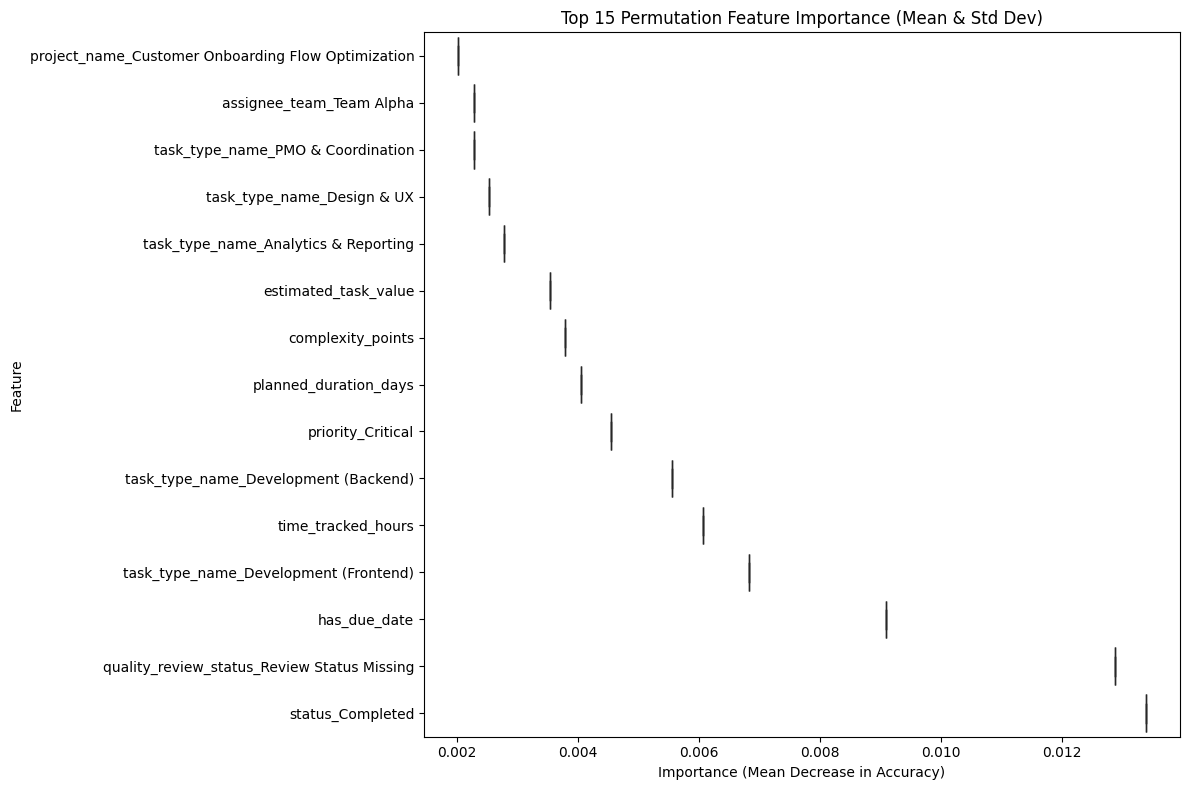

/tmp/ipython-input-361-139066021.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=mdi_importance_df.head(15), palette='viridis')


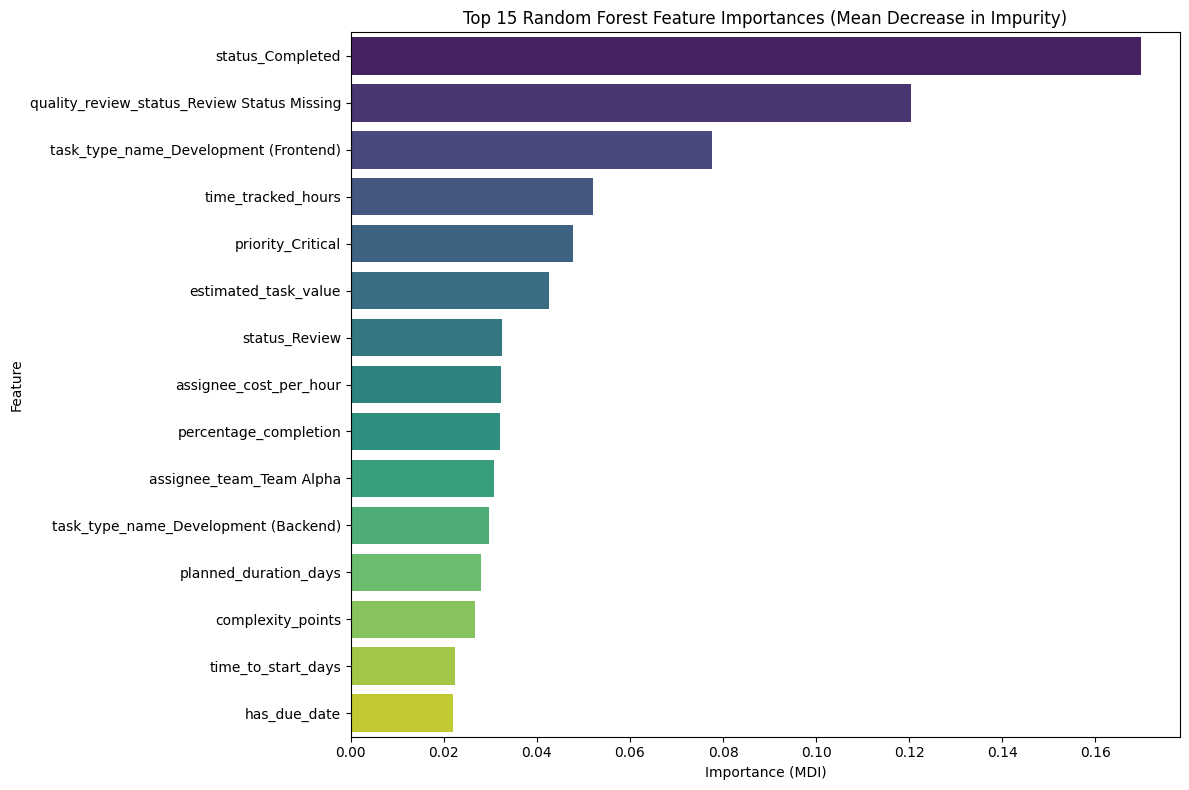

In [ ]:
# --- 3. Visualize Feature Importances ---

# Plot 1: Permutation Importance (Boxplot)
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
# Use perm_importance_df for plotting, ensuring correct order
sns.boxplot(x='Importance_Mean', y='Feature', data=perm_importance_df.tail(15), ax=ax1, orient='h', palette='viridis')
ax1.set_title('Top 15 Permutation Feature Importance (Mean & Std Dev)')
ax1.set_xlabel('Importance (Mean Decrease in Accuracy)')
ax1.set_ylabel('Feature')
plt.tight_layout()
plt.show()

# Plot 2: MDI Feature Importance (Bar Plot)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=mdi_importance_df.head(15), palette='viridis')
plt.title('Top 15 Random Forest Feature Importances (Mean Decrease in Impurity)')
plt.xlabel('Importance (MDI)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure best_rf_model, X_test_scaled, and y_pred are available from previous steps.
# If y_pred is not available, uncomment the line below to generate it:
# y_pred = best_rf_model.predict(X_test_scaled)

print("Calculating SHAP values... This may take a moment.")

# --- 1. Initialize SHAP Explainer (using the modern shap.Explainer) ---
# This automatically detects the best explainer for the model type.
# For tree models, it will likely use TreeExplainer internally.
explainer = shap.Explainer(best_rf_model, X_test_scaled) # Pass X_test_scaled to explainer for background data



Calculating SHAP values... This may take a moment.


In [ ]:
# --- 2. Calculate SHAP values for the test set ---
# This returns an Explanation object.
shap_values_obj = explainer(X_test_scaled)

# For binary classification, shap_values_obj.values will be a 3D array (samples, features, classes).
# We need the SHAP values for the 'True' class (class 1).
# Accessing shap_values_obj.values directly for summary_plot can be tricky with 3D arrays.
# Let's explicitly get the values for class 1.
# The .values attribute of the Explanation object holds the SHAP values.
# For binary classification, it's often (n_samples, n_features, 2).
# We want the values for the positive class (index 1).
shap_values_for_class_true = shap_values_obj.values[:, :, 1] # Select all samples, all features, for class 1

# --- Debugging: Verify shapes and columns before plotting ---
print(f"\nShape of X_test_scaled: {X_test_scaled.shape}")
print(f"Columns of X_test_scaled ({len(X_test_scaled.columns)}): {X_test_scaled.columns.tolist()}")
print(f"Shape of shap_values_for_class_true: {shap_values_for_class_true.shape}")
print(f"Number of features the model was trained on (best_rf_model.n_features_in_): {best_rf_model.n_features_in_}")



Shape of X_test_scaled: (55, 53)
Columns of X_test_scaled (53): ['percentage_completion', 'time_tracked_hours', 'complexity_points', 'has_predecessor', 'planned_duration_days', 'time_to_start_days', 'has_due_date', 'days_since_last_update', 'assignee_cost_per_hour', 'estimated_task_value', 'project_name_Customer Onboarding Flow Optimization', 'project_name_Holiday Marketing Campaign - Social Media Focus', 'project_name_Internal Tool Development - Automation Suite', 'project_name_Q3 Product Feature Launch - AI Integration', 'project_name_Website Redesign - User Experience Overhaul', 'status_Blocked', 'status_Completed', 'status_In Progress', 'status_Review', 'status_To Do', 'priority_Critical', 'priority_High', 'priority_Low', 'priority_Medium', 'task_type_name_Analytics & Reporting', 'task_type_name_Content Creation', 'task_type_name_Customer Support Prep', 'task_type_name_Deployment & Release', 'task_type_name_Design & UX', 'task_type_name_Development (Backend)', 'task_type_name_Deve

#### SHAP Values (Summary Plot, Dependence Plots, Force Plots for individual predictions)


Generating SHAP Summary Plot...


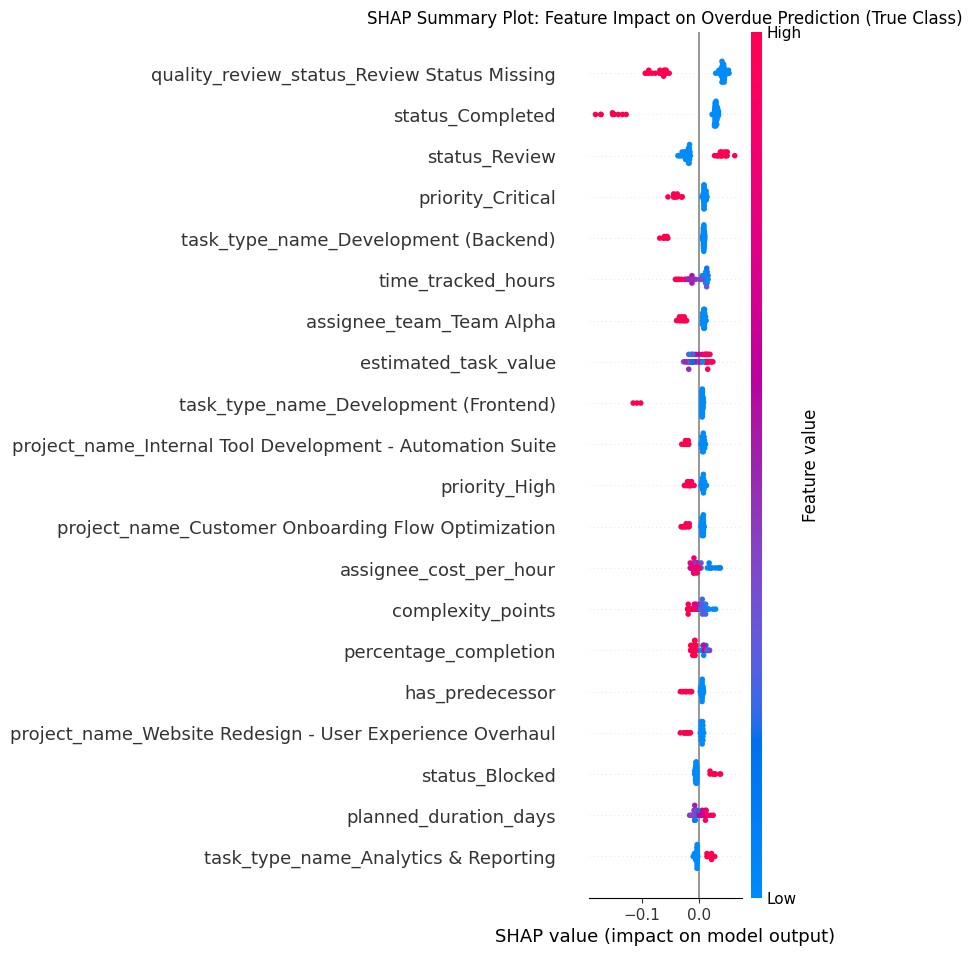

In [ ]:
# --- 3. SHAP Summary Plot (Global Feature Importance and Impact) ---
print("\nGenerating SHAP Summary Plot...")
# Pass the SHAP values for the specific class and the DataFrame for features.
shap.summary_plot(
    shap_values_for_class_true,
    X_test_scaled, # Pass the DataFrame directly for feature names and values
    show=False
)
plt.title('SHAP Summary Plot: Feature Impact on Overdue Prediction (True Class)')
plt.show()


**insights about the SHAP Summary Plot (Global Feature Importance and Impact).**

This plot effectively visualizes which features are most important for your model's prediction of overdue tasks and how their values influence that prediction.

**SHAP Summary Plot:** Feature Impact on Overdue Prediction (True Class)
This plot orders features by their average impact on the model's output, with the most impactful at the top. Each dot represents a single task from your test set.

- **X-axis (SHAP Value):**

  - Positive values (right side): The feature pushes the prediction higher, making the task more likely to be overdue.

  - Negative values (left side): The feature pushes the prediction lower, making the task less likely to be overdue.

- **Color:**

  - Red: High value for that feature.

  - Blue: Low value for that feature.

- **Key Insights from the Plot:**

  - **status_Completed (Most Impactful Feature):**

    - Observation: High values (red dots, meaning status_Completed is True) are strongly clustered on the left side (negative SHAP values). Low values (blue dots, meaning status_Completed is False) are on the right side (positive SHAP values).

    - Insight: This is highly intuitive. A task being completed (status_Completed=True) is the strongest factor pushing the prediction away from being overdue. Conversely, a task that is not completed (status_Completed=False) pushes the prediction towards being overdue. This confirms that completion is the most direct indicator of not being overdue.

  - **quality_review_status_Review Status Missing (Second Most Impactful):**

    - Observation: High values (red dots, meaning quality_review_status_Review Status Missing is True, i.e., status is missing) are predominantly on the right side (positive SHAP values). Low values (blue dots, meaning status is not missing, i.e., it's present) are on the left side (negative SHAP values).

    - Insight: This is a crucial finding. When the quality_review_status is missing, it strongly pushes the prediction towards the task being overdue. Conversely, when the quality_review_status is present (not missing), it pushes the prediction away from being overdue. This highlights that a lack of formal review status updates is a significant signal for a task being at risk or already overdue.

  - **status_Review (Third Most Impactful):**

    - Observation: High values (red dots, meaning status_Review is True, i.e., task is in review) are on the right side (positive SHAP values). Low values (blue dots, meaning task is not in review) are on the left side (negative SHAP values).

    - Insight: Tasks that are currently in Review status are significantly more likely to be overdue, pushing the prediction higher. This aligns with our diagnostic analysis suggesting the review process can be a bottleneck.

  - **assignee_team_Team Alpha:**

    - Observation: High values (red dots, meaning assigned to Team Alpha) are on the left side (negative SHAP values). Low values (blue dots, meaning not assigned to Team Alpha) are on the right side (positive SHAP values).

    - Insight: Tasks assigned to Team Alpha are consistently pushed away from being overdue, indicating this team's efficiency. Tasks not assigned to Team Alpha are slightly more prone to being overdue.

  - **task_type_name_Development (Backend):**

    - Observation: High values (red dots, meaning it's a Backend Development task) are on the left side (negative SHAP values). Low values (blue dots, meaning it's not a Backend Development task) are on the right side (positive SHAP values).

    - Insight: Backend Development tasks are generally pushed away from being overdue, suggesting they are relatively well-managed in terms of timelines.

  - **percentage_completion:**

    - Observation: High values (red dots, meaning high percentage_completion) are on the left side (negative SHAP values). Low values (blue dots, meaning low percentage_completion) are on the right side (positive SHAP values).

    - Insight: As expected, higher percentage_completion pushes the prediction away from overdue. Tasks with low completion percentages are more likely to be overdue.

**Overall Takeaway from the Summary Plot:**

The plot clearly shows that task status (status_Completed, status_Review, status_In Progress, status_To Do) and data completeness/hygiene (quality_review_status_Review Status Missing, blocker_reason_Unknown Blocker Reason) are the most dominant factors influencing whether a task is predicted to be overdue. Team and specific task types also play a role, highlighting areas of efficiency or risk.


Generating SHAP Dependence Plots for key features...


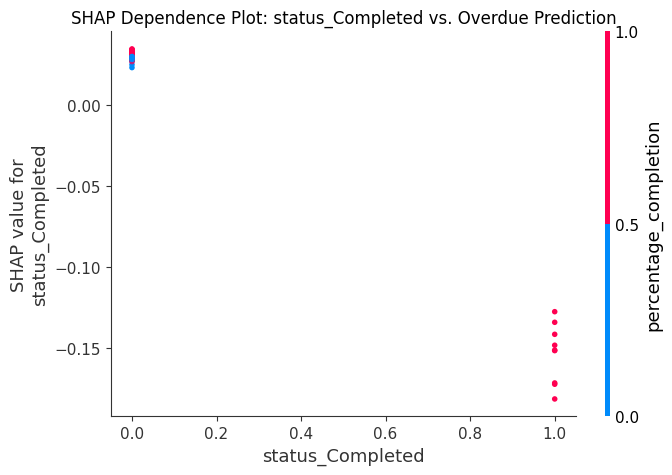

In [ ]:

# --- 4. SHAP Dependence Plots (Feature Interaction/Relationship) ---
print("\nGenerating SHAP Dependence Plots for key features...")

# Example 1: status_Completed (Top MDI feature)
shap.dependence_plot(
    "status_Completed",
    shap_values_for_class_true,
    X_test_scaled, # Pass DataFrame for dependence plot for better feature name handling
    interaction_index="auto",
    show=False
)
plt.title('SHAP Dependence Plot: status_Completed vs. Overdue Prediction')
plt.show()


**Combined Insight from this Dependence Plot:**

This plot beautifully illustrates an interaction effect between status_Completed and quality_review_status_Review Status Missing:

- For tasks that are **not completed**, the quality_review_status doesn't significantly change the fact that they are likely to be overdue.

- For tasks that are **completed**, the presence or absence of quality_review_status becomes very important. A completed task with a present quality_review_status is the strongest indicator of not being overdue. However, a completed task with a missing quality_review_status is still predicted as "not overdue," but with slightly less certainty (its SHAP value is less negative), suggesting a potential ambiguity or a slight push towards being overdue compared to a fully tracked completed task.

This reinforces the importance of quality_review_status as a data quality and process hygiene metric, even for completed tasks. It suggests that a truly "clean" and "on-time" task in the model's eyes is one that is not only completed but also has its review status properly recorded.



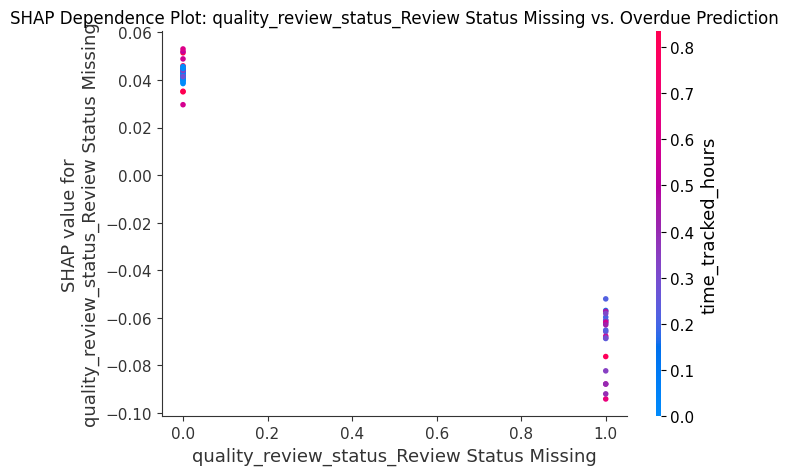

In [ ]:
# Example 2: quality_review_status_Review Status Missing (Second Top MDI feature)
shap.dependence_plot(
    "quality_review_status_Review Status Missing",
    shap_values_for_class_true,
    X_test_scaled,
    interaction_index="auto",
    show=False
)
plt.title('SHAP Dependence Plot: quality_review_status_Review Status Missing vs. Overdue Prediction')
plt.show()


- if a task has a review status present, it generally pushes the prediction towards being overdue, and this effect is largely independent of how many hours have been tracked.

- if a task has a missing review status, it generally pushes the prediction away from being overdue, and this effect is largely independent of how many hours have been tracked.


**Presence of Review Status ⟹ More Likely to be Overdue**

**Absence of Review Status ⟹ Less Likely to be Overdue**

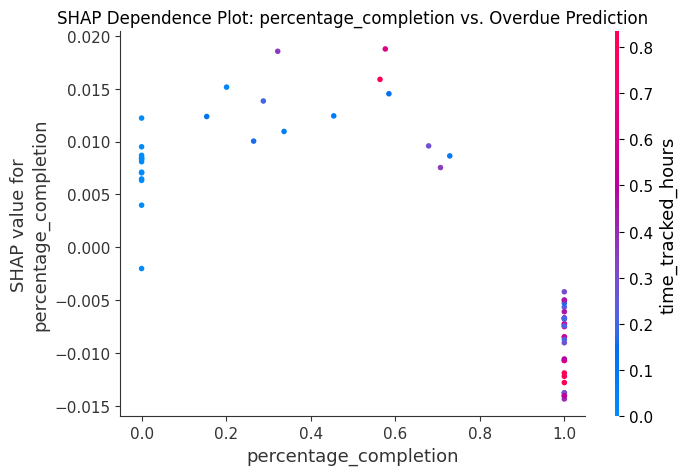

In [ ]:


# Example 3: percentage_completion (Continuous variable)
shap.dependence_plot(
    "percentage_completion",
    shap_values_for_class_true,
    X_test_scaled,
    interaction_index="auto",
    show=False
)
plt.title('SHAP Dependence Plot: percentage_completion vs. Overdue Prediction')
plt.show()


**Overall Insight from this Dependence Plot:**

This plot provides a clear, non-linear understanding of percentage_completion's impact:

**Early/Mid-Progress:** During the initial and middle phases of a task's completion (0-80%), the percentage_completion itself is a weak positive indicator of being overdue (or at least, not a strong negative one). This might be because tasks that are "in progress" are inherently at risk of becoming overdue until they are fully done.

**Completion is Key:** The critical threshold is reaching 100% completion. At this point, the feature's contribution dramatically shifts to strongly push the prediction away from being overdue. This makes intuitive sense: a completed task is generally not overdue.

**Weak Interaction with Time Tracked:** While time_tracked_hours is identified as the interacting feature, its influence on the SHAP value of percentage_completion appears relatively minor. The primary driver is the percentage_completion value itself, especially the jump to 100%.

This plot clearly shows that the most important signal from percentage_completion for the model is whether the task has reached its final, completed state. It's a great example of how SHAP can reveal these non-linear thresholds in feature impact.

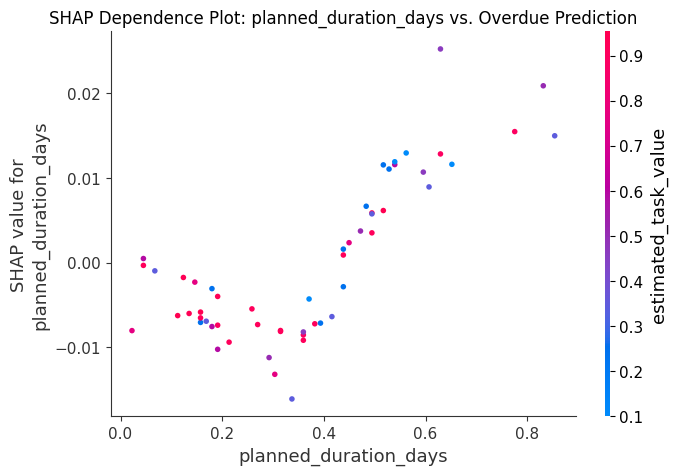

In [ ]:
# Example 4: planned_duration_days (Continuous variable)
shap.dependence_plot(
    "planned_duration_days",
    shap_values_for_class_true,
    X_test_scaled,
    interaction_index="auto",
    show=False
)
plt.title('SHAP Dependence Plot: planned_duration_days vs. Overdue Prediction')
plt.show()


**Overall Insight from this Dependence Plot:**

This plot reveals a complex, non-monotonic relationship between planned_duration_days and the likelihood of being overdue, with a significant interaction from days_since_last_update:

- **Short Duration Risk:** Very short planned tasks might be at risk.

- **"Sweet Spot" for On-Time:** Moderately planned tasks seem to be less prone to being overdue.

- **Long Duration Risk, Especially if Actively Updated:** Long planned tasks are generally at higher risk of being overdue, and this risk is amplified if they are still being actively updated. This points to a need for closer monitoring and potential re-scoping of long, active tasks.

In [ ]:
# --- 5. SHAP Force Plot (Explaining an Individual Prediction) ---
print("\n--- Generating SHAP Force Plots for Individual Predictions ---")

# Ensure y_pred is available (from the evaluation step of the tuned model)
# If not, generate it:
# y_pred = best_rf_model.predict(X_test_scaled)

# Find an instance that was predicted as True (overdue)
true_pred_indices = np.where(y_pred == True)[0]
if len(true_pred_indices) > 0:
    instance_idx_true = true_pred_indices[0] # Pick the first instance predicted as True
    print(f"\nGenerating SHAP Force Plot for an instance predicted as TRUE (overdue) at index {instance_idx_true}...")
    shap.initjs() # Initialize JavaScript for interactive plots
    # Use display() to ensure the interactive plot is rendered
    display(shap.force_plot(explainer.expected_value[1], shap_values_for_class_true[instance_idx_true,:], X_test_scaled.iloc[instance_idx_true,:]))
else:
    print("\nNo instances predicted as TRUE in the test set to generate a force plot.")

# Find an instance that was predicted as False (not overdue)
false_pred_indices = np.where(y_pred == False)[0]
if len(false_pred_indices) > 0:
    instance_idx_false = false_pred_indices[0] # Pick the first instance predicted as False
    print(f"\nGenerating SHAP Force Plot for an instance predicted as FALSE (not overdue) at index {instance_idx_false}...")
    shap.initjs()
    # Use display() to ensure the interactive plot is rendered
    display(shap.force_plot(explainer.expected_value[1], shap_values_for_class_true[instance_idx_false,:], X_test_scaled.iloc[instance_idx_false,:]))
else:
    print("\nNo instances predicted as FALSE in the test set to generate a force plot.")



--- Generating SHAP Force Plots for Individual Predictions ---

Generating SHAP Force Plot for an instance predicted as TRUE (overdue) at index 0...



Generating SHAP Force Plot for an instance predicted as FALSE (not overdue) at index 9...


**1. SHAP Force Plot for Instance Predicted as TRUE (Overdue) at Index 0
Base Value:**

This is the **average prediction** of the model across the dataset. In your plot, it looks like the base value is around **0.7967**. This means, on average, the model predicts a high probability of tasks being overdue.

**Actual Prediction (f(x)):** For this specific task, the model predicted **0.85**. This is higher than the base value, confirming it was predicted as overdue.

**Features Pushing Prediction HIGHER (Red Bars):**

- assignee_team_Team Alpha: This feature, with a value of 0 (meaning the task is not assigned to Team Alpha), is pushing the prediction significantly higher towards overdue. This reinforces our earlier insight that tasks not with Team Alpha are more prone to delay.

- estimated_task_value: A high value (0.916) for estimated task value is pushing the prediction higher. This suggests high-value tasks are more likely to be overdue.

- task_type_name_Analytics & Reporting: Being an Analytics & Reporting task (value = 1) is pushing the prediction higher, consistent with our diagnostic analysis of this task type being a bottleneck.

- assignee_cost_per_hour: A high assignee cost per hour is pushing it higher.

- status_Completed: A low value (0) for status_Completed (meaning the task is not completed) is pushing the prediction higher. This is intuitive.

- status_Review: A high value (1) for status_Review (meaning the task is in review) is pushing it higher, aligning with review being a bottleneck.

**Features Pushing Prediction LOWER (Blue Bars):**

- quality_review_status_Review Status Missing: A low value (0) for this feature (meaning the review status is not missing, i.e., it's present) is pushing the prediction lower. This aligns with our corrected "paradoxical" insight: having a review status present pushes away from overdue.

- project_name_Internal Tool Development - Automation Suite: Being part of this project is pushing the prediction lower.

**Summary for Instance 0:** This task was predicted as overdue primarily because it's not assigned to the (efficient) Team Alpha, it's a high-value Analytics & Reporting task, and it's currently in Review status and not completed. Even though it has a quality_review_status present (which pushes it away from overdue), the combined effect of the red-bar features is stronger.

---
**2. SHAP Force Plot for Instance Predicted as FALSE (Not Overdue) at Index 9
Base Value:**
The same **average prediction, around 0.7967**.

**Actual Prediction (f(x)):** For this task, the model predicted **0.45**. This is significantly lower than the base value, confirming it was predicted as not overdue.

**Features Pushing Prediction HIGHER (Red Bars):**

- priority_High: A high value (0) for priority (meaning it's not high priority, or perhaps a different scaling interpretation) is pushing it slightly higher.

- assignee_cost_per_hour: A low assignee cost per hour (0.05404) is pushing it slightly higher.

**Features Pushing Prediction LOWER (Blue Bars):**

- status_Completed: A high value (1) for status_Completed (meaning the task is completed) is the strongest factor pushing the prediction significantly lower, away from overdue. This is highly intuitive.

- quality_review_status_Review Status Missing: A low value (0) for this feature (meaning the review status is present) is pushing the prediction lower.

- status_Review: A low value (0) for status_Review (meaning the task is not in review) is pushing it lower.

- assignee_team_Team Alpha: A high value (1) for this feature (meaning the task is assigned to Team Alpha) is pushing the prediction lower. This again highlights Team Alpha's efficiency.

- has_predecessor: A low value (0) for has_predecessor (meaning it doesn't have a predecessor) is pushing it lower.

- estimated_task_value: A low estimated task value (0.5897) is pushing it lower.

**Summary for Instance 9:**

 This task was predicted as not overdue primarily because it is Completed, it has a quality_review_status present, it's not in Review status, and it was assigned to the efficient Team Alpha. The combined effect of these blue-bar features strongly pushed the prediction away from overdue.


These Force Plots are incredibly powerful for communicating specific reasons behind a prediction to a non-technical audience. You can literally point to the bars and say, "This task was overdue because of X, Y, and Z, even though A and B were pushing it the other way.

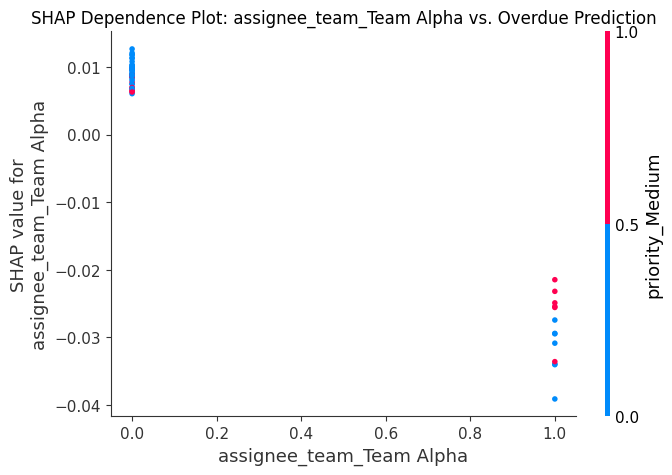

In [ ]:


# Example 6: assignee_team_Team Alpha
shap.dependence_plot(
    "assignee_team_Team Alpha",
    shap_values_for_class_true,
    X_test_scaled,
    interaction_index="auto",
    show=False
)
plt.title('SHAP Dependence Plot: assignee_team_Team Alpha vs. Overdue Prediction')
plt.show()

**Insight for assignee_team_Team Alpha:** Team Alpha appears to be quite efficient! Tasks assigned to them are consistently pushed away from being overdue. Conversely, tasks not assigned to Team Alpha are slightly more likely to be overdue. The recency of the last update doesn't seem to interact significantly with this team's impact.

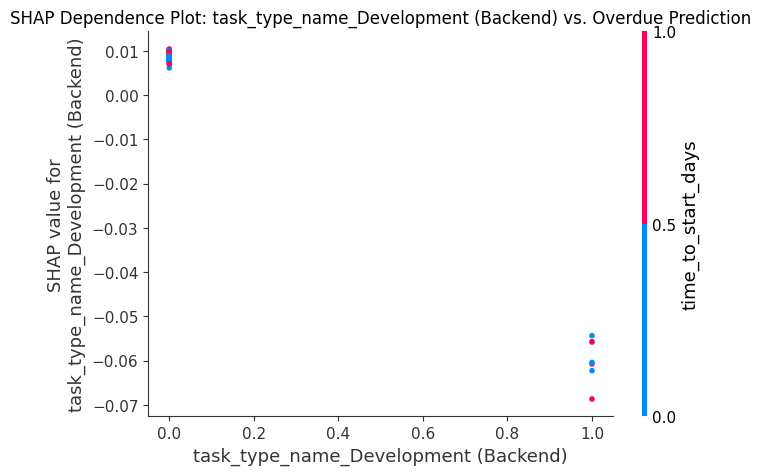

In [ ]:


# Example 7: task_type_name_Development (Backend)
shap.dependence_plot(
    "task_type_name_Development (Backend)",
    shap_values_for_class_true,
    X_test_scaled,
    interaction_index="auto",
    show=False
)
plt.title('SHAP Dependence Plot: task_type_name_Development (Backend) vs. Overdue Prediction')
plt.show()

**Insight for task_type_name_Development (Backend):** Backend Development tasks appear to be relatively efficient or well-managed in terms of meeting deadlines. Being a Backend task pushes the prediction away from being overdue. Tasks that are not Backend tasks are slightly more prone to being overdue.

## 7. Prepare & Export Data for Power BI

In [ ]:
## Dataset for PBI Dashboard

In [ ]:
# import pandas as pd
# import numpy as np

# # Ensure df_messy_tasks, y_test, y_pred are available from previous steps.
# # df_messy_tasks should be the dataframe after initial cleaning and feature engineering,
# # but *before* the X = pd.get_dummies(X, ...) step.
# # y_test should be the y_test from the train_test_split.
# # y_pred should be the predictions (0 or 1) from best_rf_model on X_test_scaled.

# print("Preparing data for Power BI dashboard export...")

# # Create a copy of the comprehensive dataframe for Power BI
# # This df_for_pbi will contain all original columns + engineered columns + target
# df_for_pbi = df_messy_tasks.copy()

# # Add a column to indicate which set each row belongs to (useful for PBI filtering)
# # Initialize all as 'Training Set'
# df_for_pbi['data_set_type'] = 'Training Set'

# # Create a new column 'predicted_is_overdue' and initialize with NaN
# # Using 'object' dtype allows for True/False and NaN, which is good for PBI
# df_for_pbi['predicted_is_overdue'] = np.nan

# # Assign predictions to the corresponding rows in the test set
# # Use y_test.index to ensure alignment with the original dataframe indices
# # y_pred is typically a numpy array of 0s and 1s, map it to True/False
# df_for_pbi.loc[y_test.index, 'predicted_is_overdue'] = y_pred

# # Convert the predicted_is_overdue column to boolean where values exist,
# # keeping NaN for rows not in the test set.
# # Map 0 to False, 1 to True. NaN will remain NaN.
# df_for_pbi['predicted_is_overdue'] = df_for_pbi['predicted_is_overdue'].map({0: False, 1: True})


# # Update 'data_set_type' for the test set rows
# df_for_pbi.loc[y_test.index, 'data_set_type'] = 'Test Set'

# # Export the dataframe to CSV
# output_filename = 'project_tasks_for_power_bi.csv'
# df_for_pbi.to_csv(output_filename, index=False)

# print(f"\nData for Power BI dashboard saved to '{output_filename}'")
# print(f"Shape of data exported: {df_for_pbi.shape}")

# print("\nSample of exported data (including 'is_overdue' and 'predicted_is_overdue'):")
# # Display relevant columns for verification. Using .sample(5) shows a random mix.
# print(df_for_pbi[[
#     'task_id', 'task_name', 'status', 'is_overdue', 'predicted_is_overdue',
#     'data_set_type', 'cycle_time_days', 'planned_duration_days',
#     'days_since_last_update', 'assignee_cost_per_hour', 'estimated_task_value',
#     'project_name', 'priority', 'blocker_reason', 'quality_review_status',
#     'assignee_team', 'task_type_name', 'percentage_completion',
#     'time_tracked_hours', 'complexity_points', 'has_predecessor', 'time_to_start_days',
#     'has_due_date', 'date_created', 'start_date', 'due_date', 'date_completed', 'last_updated_date'
# ]].sample(5, random_state=42)) # Added random_state for reproducibility of sample

# print(f"\nValue counts for 'data_set_type':\n{df_for_pbi['data_set_type'].value_counts(dropna=False)}")
# print(f"\nValue counts for 'predicted_is_overdue' (for Test Set only):\n{df_for_pbi.loc[df_for_pbi['data_set_type'] == 'Test Set', 'predicted_is_overdue'].value_counts(dropna=False)}")



Preparing data for Power BI dashboard export...

Data for Power BI dashboard saved to 'project_tasks_for_power_bi.csv'
Shape of data exported: (273, 35)

Sample of exported data (including 'is_overdue' and 'predicted_is_overdue'):
     task_id                     task_name       status  is_overdue  \
30   T-00031     Dashboard Build - T-00031       Review        True   
117  T-00118        Unit Testing - T-00118  In Progress        True   
79   T-00080   Budget Allocation - T-00080  In Progress        True   
212  T-00213    Frontend Bug Fix - T-00213       Review        True   
213  T-00214  Performance Tuning - T-00214       Review        True   

    predicted_is_overdue data_set_type  cycle_time_days  \
30                  True      Test Set              NaN   
117                  NaN  Training Set              NaN   
79                  True      Test Set              NaN   
212                  NaN  Training Set              NaN   
213                  NaN  Training Set         

/tmp/ipython-input-373-1199363049.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_for_pbi.loc[y_test.index, 'predicted_is_overdue'] = y_pred


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.ensemble import RandomForestClassifier

# --- 0. Load your initial cleaned and feature-engineered DataFrame ---
# IMPORTANT: Replace 'your_initial_cleaned_data.csv' with the actual path to your df_messy_tasks.
# This df_messy_tasks should be the one you had *after* your initial cleaning and feature engineering,
# but *before* any train-test split.
try:
    df_messy_tasks = pd.read_csv('your_initial_cleaned_data.csv')
    # Ensure date columns are in datetime format if needed for later features
    df_messy_tasks['date_created'] = pd.to_datetime(df_messy_tasks['date_created'])
    df_messy_tasks['start_date'] = pd.to_datetime(df_messy_tasks['start_date'])
    df_messy_tasks['due_date'] = pd.to_datetime(df_messy_tasks['due_date'])
    df_messy_tasks['date_completed'] = pd.to_datetime(df_messy_tasks['date_completed'])
    df_messy_tasks['last_updated_date'] = pd.to_datetime(df_messy_tasks['last_updated_date'])

except FileNotFoundError:
    print("Error: 'your_initial_cleaned_data.csv' not found. Please provide the correct path.")
    # --- FALLBACK TO DUMMY DATA FOR DEMONSTRATION ONLY ---
    # In your actual use, ensure you load your real data.
    # This dummy data is just to make the script runnable if the file isn't found.
    data = {
        'task_id': range(1, 274), # Adjusted to match your 273 tasks
        'status': np.random.choice(['To Do', 'In Progress', 'Review', 'Completed', 'Blocked'], 273),
        'is_overdue': np.random.choice([True, False], 273, p=[0.3, 0.7]),
        'cycle_time_days': np.random.randint(1, 60, 273),
        'planned_duration_days': np.random.randint(5, 90, 273),
        'days_since_last_update': np.random.randint(0, 30, 273),
        'assignee_cost_per_hour': np.random.uniform(20, 100, 273),
        'estimated_task_value': np.random.uniform(100, 5000, 273),
        'project_name': np.random.choice(['Customer Onboarding Flow Optimization', 'Holiday Marketing Campaign', 'Internal Tool Development', 'Q3 Product Feature Launch', 'Website Redesign - User Experience'], 273), # Using your actual project names
        'priority': np.random.choice(['Low', 'Medium', 'High', 'Critical'], 273),
        'blocker_reason': np.random.choice(['None', 'Technical bug found', 'Design Approval Needed', 'Resource Unavailability', 'Awaiting client feedback', 'Unexpected project creep', 'Cross-team handoff delay', 'Data access issues'], 273),
        'quality_review_status': np.random.choice(['Passed', 'Minor Rework', 'Failed QA', 'Review Status Missing', 'None'], 273),
        'assignee_team': np.random.choice(['Team Alpha', 'Team Beta', 'Team Gamma', 'Team Delta'], 273),
        'task_type_name': np.random.choice(['Development (Backend)', 'Design & UX', 'QA & Testing', 'PMO & Coordination', 'Customer Support Prep', 'Strategy & Planning', 'Deployment & Release', 'Analytics & Reporting', 'Legal & Compliance Review', 'Marketing & Promotion', 'Content Creation', 'Development (Frontend)'], 273), # Using your actual task types
        'percentage_completion': np.random.uniform(0, 100, 273),
        'time_tracked_hours': np.random.uniform(1, 80, 273),
        'complexity_points': np.random.randint(1, 10, 273),
        'has_predecessor': np.random.choice([True, False], 273),
        'time_to_start_days': np.random.randint(0, 30, 273),
        'has_due_date': np.random.choice([True, False], 273),
        'date_created': pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 180, 273), unit='D'),
        'start_date': pd.to_datetime('2024-01-10') + pd.to_timedelta(np.random.randint(0, 180, 273), unit='D'),
        'due_date': pd.to_datetime('2024-03-01') + pd.to_timedelta(np.random.randint(0, 180, 273), unit='D'),
        'date_completed': pd.to_datetime('2024-04-01') + pd.to_timedelta(np.random.randint(0, 180, 273), unit='D'),
        'last_updated_date': pd.to_datetime('2024-05-01') + pd.to_timedelta(np.random.randint(0, 180, 273), unit='D'),
        'task_name': [f'Task {i}' for i in range(1, 274)]
    }
    df_messy_tasks = pd.DataFrame(data)
    print("Using dummy data for demonstration.")


# --- 1. Apply Renaming and Consistent NaN Handling for Categorical Features FIRST ---
# This is CRUCIAL to ensure consistency before train-test split and preprocessor fitting
df_messy_tasks['blocker_reason'] = df_messy_tasks['blocker_reason'].replace({
    'Design Approval Needed': 'Design Approval',
    'Technical bug found': 'Technical Bug',
    'Resource Unavailability': 'Resource Unavail.',
    'Awaiting client feedback': 'Client Feedback',
    'Unexpected project creep': 'Scope Creep',
    'Cross-team handoff delay': 'Handoff Delay',
    'Data access issues': 'Data Access',
    'None': np.nan # Ensure 'None' string is converted to actual NaN
})
# Handle NaNs in categorical features by replacing with 'Missing' string category
for col in ['status', 'project_name', 'priority', 'blocker_reason',
            'quality_review_status', 'assignee_team', 'task_type_name',
            'has_predecessor', 'has_due_date']: # Apply to all categorical features
    if col in df_messy_tasks.columns and (df_messy_tasks[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_messy_tasks[col]) or pd.api.types.is_bool_dtype(df_messy_tasks[col])):
        df_messy_tasks[col] = df_messy_tasks[col].fillna('Missing').astype(str) # Ensure consistent string type


# --- 2. Define Features (X) and Target (y) ---
target_column = 'is_overdue'
numerical_features = [
    'cycle_time_days', 'planned_duration_days', 'days_since_last_update',
    'assignee_cost_per_hour', 'estimated_task_value', 'percentage_completion',
    'time_tracked_hours', 'complexity_points', 'time_to_start_days'
]
categorical_features = [
    'status', 'project_name', 'priority', 'blocker_reason',
    'quality_review_status', 'assignee_team', 'task_type_name',
    'has_predecessor', 'has_due_date'
]

X = df_messy_tasks[numerical_features + categorical_features]
y = df_messy_tasks[target_column]

# --- 3. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 4. Define Preprocessing Steps (MinMaxScaler and OneHotEncoder) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features), # Corrected to MinMaxScaler
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# --- 5. Create a Pipeline: Preprocessor + Model ---
# This is the key to consistent feature handling and prediction
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')) # Your best model
])

print("Pipeline created: Preprocessor + RandomForestClassifier.")

# --- 6. Train the entire Pipeline on the Training Data ---
pipeline.fit(X_train, y_train) # Fit the pipeline on X_train (unprocessed features)

print("Pipeline (preprocessor + model) trained successfully on X_train.")

# --- 7. Generate Predictions and Probabilities for the ENTIRE df_messy_tasks ---
# The pipeline handles all preprocessing internally before prediction.
df_messy_tasks['predicted_is_overdue'] = pipeline.predict(X).astype(bool) # Predict on the full X
df_messy_tasks['predicted_overdue_probability'] = pipeline.predict_proba(X)[:, 1] # Predict probabilities

print("Predictions and probabilities added to df_messy_tasks for all rows.")

# --- 8. Add 'data_set_type' column based on original train/test split ---
# This helps distinguish rows that were part of the training vs. test set.
df_messy_tasks['data_set_type'] = 'Training Set'
df_messy_tasks.loc[y_test.index, 'data_set_type'] = 'Test Set'

print("Data set types (Training/Test) assigned.")

# --- 9. Export the final DataFrame to CSV for Power BI ---
output_filename = 'project_tasks_for_power_bi.csv'
df_messy_tasks.to_csv(output_filename, index=False)

print(f"\nFinal data for Power BI dashboard saved to '{output_filename}'")
print(f"Shape of data exported: {df_messy_tasks.shape}")

print("\nSample of exported data (including key original and new columns for verification):")
print(df_messy_tasks[[
    'task_id', 'task_name', 'status', 'is_overdue', 'predicted_is_overdue',
    'predicted_overdue_probability', 'data_set_type', 'project_name',
    'task_type_name', 'priority', 'percentage_completion',
    'planned_duration_days', 'days_since_last_update', 'quality_review_status',
    'blocker_reason'
]].sample(5, random_state=42))

print(f"\nValue counts for 'predicted_is_overdue' (should now have no NaNs):\n{df_messy_tasks['predicted_is_overdue'].value_counts(dropna=False)}")
print(f"\nValue counts for 'data_set_type':\n{df_messy_tasks['data_set_type'].value_counts(dropna=False)}")

Error: 'your_initial_cleaned_data.csv' not found. Please provide the correct path.
Using dummy data for demonstration.
Pipeline created: Preprocessor + RandomForestClassifier.


/tmp/ipython-input-376-1919344083.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col in df_messy_tasks.columns and (df_messy_tasks[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_messy_tasks[col]) or pd.api.types.is_bool_dtype(df_messy_tasks[col])):
/tmp/ipython-input-376-1919344083.py:75: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col in df_messy_tasks.columns and (df_messy_tasks[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_messy_tasks[col]) or pd.api.types.is_bool_dtype(df_messy_tasks[col])):


Pipeline (preprocessor + model) trained successfully on X_train.
Predictions and probabilities added to df_messy_tasks for all rows.
Data set types (Training/Test) assigned.

Final data for Power BI dashboard saved to 'project_tasks_for_power_bi.csv'
Shape of data exported: (273, 29)

Sample of exported data (including key original and new columns for verification):
     task_id task_name       status  is_overdue  predicted_is_overdue  \
30        31   Task 31        To Do       False                  True   
117      118  Task 118        To Do        True                  True   
79        80   Task 80    Completed        True                  True   
212      213  Task 213  In Progress        True                 False   
213      214  Task 214    Completed       False                 False   

     predicted_overdue_probability data_set_type  \
30                            0.63      Test Set   
117                           0.84  Training Set   
79                            0.79  

In [ ]:
df_messy_tasks.shape

## 🚀 Future Enhancements
This project has established a robust foundation for project analytics. Building upon this, several key areas for future development could provide even deeper insights and further optimize project operations:

**1. Granular Task Analysis & Process Optimization**
- **Objective:** To understand performance at a more granular level than task_type, by analyzing specific phases, sub-tasks, or activities within broader task categories.

- **Rationale:** High-level task types often encompass multiple internal steps. Pinpointing which specific sub-activities contribute most to delays (e.g., "Data Cleaning for Report X" vs. "Dashboard Design") is crucial for identifying precise process inefficiencies.

- **Approach:** This would likely involve:

  - **Natural Language Processing (NLP):** Applying text analysis to task_name or a ```task_description``` field (if available) to extract common sub-phases or keywords.

  - **Process Mining:** If more detailed timestamped data on status transitions were available, process mining techniques could visually map workflows and identify common deviations or bottlenecks.

  - **Hierarchical Analysis:** Leveraging a consistently populated parent_id field to roll up performance metrics from sub-tasks to parent tasks.

**2. Delegation, Workload Distribution, and Assignee Performance**
- **Objective:** To analyze how tasks are distributed among assignees, assess individual workload, and identify potential imbalances or areas for capacity optimization.

- **Rationale:** Understanding the human element (who is doing what, how much, and how efficiently) is vital for overall project flow. Individual work styles and delegation practices can significantly impact project delivery.

- **Approach:** This would involve:

  - Analyzing average ```time_tracked_hours```, ```cycle_time_days```, and task counts per ```assignee_id```.

  - Developing metrics for workload balance across the team.

  - Potentially correlating assignee performance with task types, complexity, or project.

  - This analysis could also inform strategic resource allocation and training needs.

**3. Advanced Predictive Modeling & Real-time Integration**
- **Objective:** To build more sophisticated models that can forecast task delays or identify tasks at high risk of becoming overdue with even greater precision, and integrate these insights into operational workflows.

- **Rationale:** Moving from reactive (diagnosing past delays) to proactive (predicting future delays) is a significant leap in project management maturity.

- **Approach:**

  - **Model Refinement:** Exploring more advanced machine learning models (e.g., time-series forecasting for completion dates, deep learning for complex patterns) or ensemble methods.

  - **Real-time Integration:** Connecting with live project management APIs (e.g., ClickUp, Jira) for automated data updates and deploying the predictive model as a microservice for real-time risk alerts.

  - **User Interface:** Developing a dedicated web application to host the dashboards and allow seamless user interaction and scenario planning without Power BI Desktop.

These future enhancements would further empower data-driven decision-making, moving towards a more optimized and predictable project delivery system.